# House Price Prediction

# Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.


The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?


Business Goal:


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.


Technical Requirements:
    
    
• Data contains 1460 entries each having 81 variables.

• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

• Extensive EDA has to be performed to gain relationships of important variable and price.

• Data contains numerical as well as categorical variable. You need to handle them accordingly.

• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters. 

• You need to find important features which affect the price positively or negatively.

• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.


In [9]:
#lets Load the dataset and required libraries..

In [10]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns
#pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

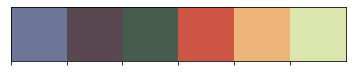

In [11]:
# Color Palettes
colors = ["#6D7696", "#59484F", "#455C4F", "#CC5543", "#EDB579", "#DBE6AF"]
sns.palplot(sns.color_palette(colors))

In [12]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax


# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [13]:
train=pd.read_csv('train.csv')
train.shape

(1168, 81)

In [14]:
train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   127         120       RL          NaN     4928   Pave   NaN      IR1   
1   889          20       RL         95.0    15865   Pave   NaN      IR1   
2   793          60       RL         92.0     9920   Pave   NaN      IR1   
3   110          20       RL        105.0    11751   Pave   NaN      IR1   
4   422          20       RL          NaN    16635   Pave   NaN      IR1   
5  1197          60       RL         58.0    14054   Pave   NaN      IR1   
6   561          20       RL          NaN    11341   Pave   NaN      IR1   
7  1041          20       RL         88.0    13125   Pave   NaN      Reg   
8   503          20       RL         70.0     9170   Pave   NaN      Reg   
9   576          50       RL         80.0     8480   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
8         Lvl    AllPub  ...        0    NaN  GdPrv        Shed     400   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  
5     11   2006       New        Partial     219210  
6      5   2010        WD         Normal     121500  
7      1   2006        WD         Normal     155000  
8      4   2007        WD         Normal     140000  
9     10   2008       COD        Abnorml     118500  

[10 rows x 81 columns]

In [15]:
test=pd.read_csv('test.csv')
test.shape

(292, 80)

In [16]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [17]:
# Remove the Ids from train and test, as they are unique for each row and hence not useful for the model
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape, test.shape

((1168, 80), (292, 79))

# DataSet Attributions:

These attibutions helps to understand each feature column with ease.



SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold


SaleType: Type of sale

SaleCondition: Condition of sale


# Here we can easily se that sale price attibute defines the price of the House and also the output variable.;and rest of the variables are input variables.

# EDA Process:¶
In choosing the right features to feed into our model, we want to capture the input variables most strongly related to the target variable.

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          77 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

# Observations:
    1.From above code we observe that there are lots of null values present in the data set.
    
    2.This dataset having all the house amenties , so null values may represent that perticular amenty is absent in the house.

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    247 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   Alley          14 non-null     object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBuilt 

# Observations:

    1. Both the train data and test data having null values.
    2. Test data having same feature columns except sales price.

In [20]:
train.shape

(1168, 80)

# observations:
    
    1.train data set having 1168 rows and 81 columns.

In [21]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

The Goal:
    
    1.Each row in the dataset describes the characteristics of a house.
    
    2.Our goal is to predict the SalePrice, given these features.

In [22]:
# Preview the data we're working with
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0         120       RL          NaN     4928   Pave   NaN      IR1   
1          20       RL         95.0    15865   Pave   NaN      IR1   
2          60       RL         92.0     9920   Pave   NaN      IR1   
3          20       RL        105.0    11751   Pave   NaN      IR1   
4          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2         Lvl    AllPub   CulDSac  ...        0    NaN    NaN         NaN   
3         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2007        WD         Normal     128000  
1       0     10    2007        WD         Normal     268000  
2       0      6    2007        WD         Normal     269790  
3       0      1    2010       COD         Normal     190000  
4       0      6    2009        WD         Normal     215000  

[5 rows x 80 columns]

# SalePrice:
    
    1.The variable we're trying to predict

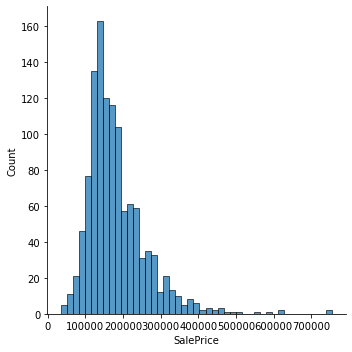

In [23]:
train.SalePrice.value_counts()
sns.displot(train['SalePrice'])


Observations:

    1.As seen from above distribution plot that Sale Price are not equally distributed.

    2.Data is skewed towards right.

    3.Major Sale Price are distributed between 100000-400000 dollor.

# Biveriate analysis for better understanding which feature columns are impacting more on Predicting Sales Prices.

# VisualLization with taget variable.

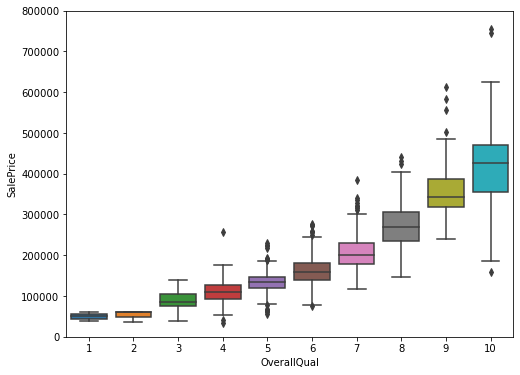

In [24]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=train['OverallQual'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


Observations:
    
    1.As from above observations,Over all quality increases the Sale price of the House.
    
    2.Overall quality will depends on other features as well.
    
    3.As Score increases Sales price also increases. 

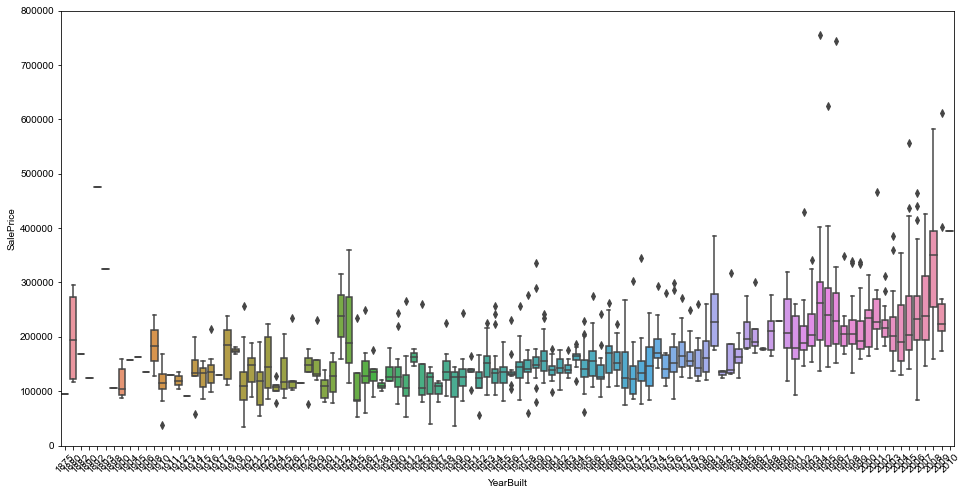

In [25]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=train['YearBuilt'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);
sns.set(font_scale=1.2)

Observations:
    
    1.As from above observations,as we years increases Sales Prices also increases.
    
    2.Property Rates increases with time as property getting old there prices are getting higher.
 

In [26]:
import plotly.express as px
fig = px.histogram(train, 
                   x='SalePrice', 
                   marginal='box', 
                   color='SaleCondition', 
                   color_discrete_sequence=['green', 'grey','red','orange','blue','blueviolet', 'brown', 'burlywood', 'chocolate', 'darkblue','olive','pink'], 
                   title='Sale Price vs Sale condition')
fig.update_layout(bargap=0.1)
fig.show()

Observations:

    1.As from above observations and plotting we can easily see the Sales Conditions increases       the Sales Pricing.
    2.Abnormal condition increases the sales Prices as expected.

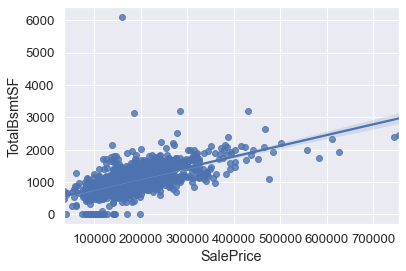

In [27]:
# draw regplot
sns.regplot(x = "SalePrice", 
            y = "TotalBsmtSF", 
            data = train)
  
# show the plot
plt.show()

Observations:

1.As from above observations and plotting we can easily see the total basement area increases
the Sales Pricing.


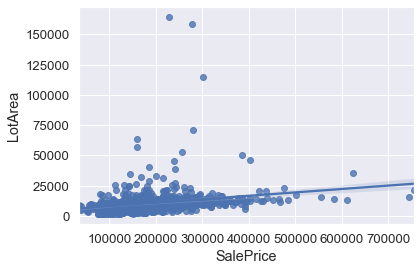

In [28]:
# draw regplot
sns.regplot(x = "SalePrice", 
            y = "LotArea", 
            data = train)
  
# show the plot
plt.show()

Observations:

1.As from above observations and plotting we can easily see the LotArea increases
the Sales Pricing.


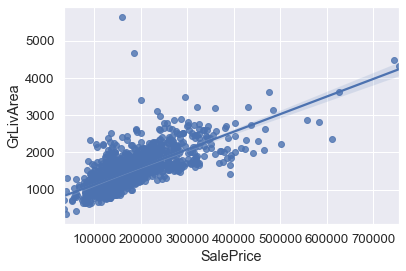

In [29]:
# draw regplot
sns.regplot(x = "SalePrice", 
            y = "GrLivArea", 
            data = train)
  
# show the plot
plt.show()

#GrLivArea: Above grade (ground) living area square feet
Observations:

    1.As from above observations and plotting we can easily see the GrLivArea increases the Sales Pricing

# CORRELATION BETWEEN THE COLUMNS:

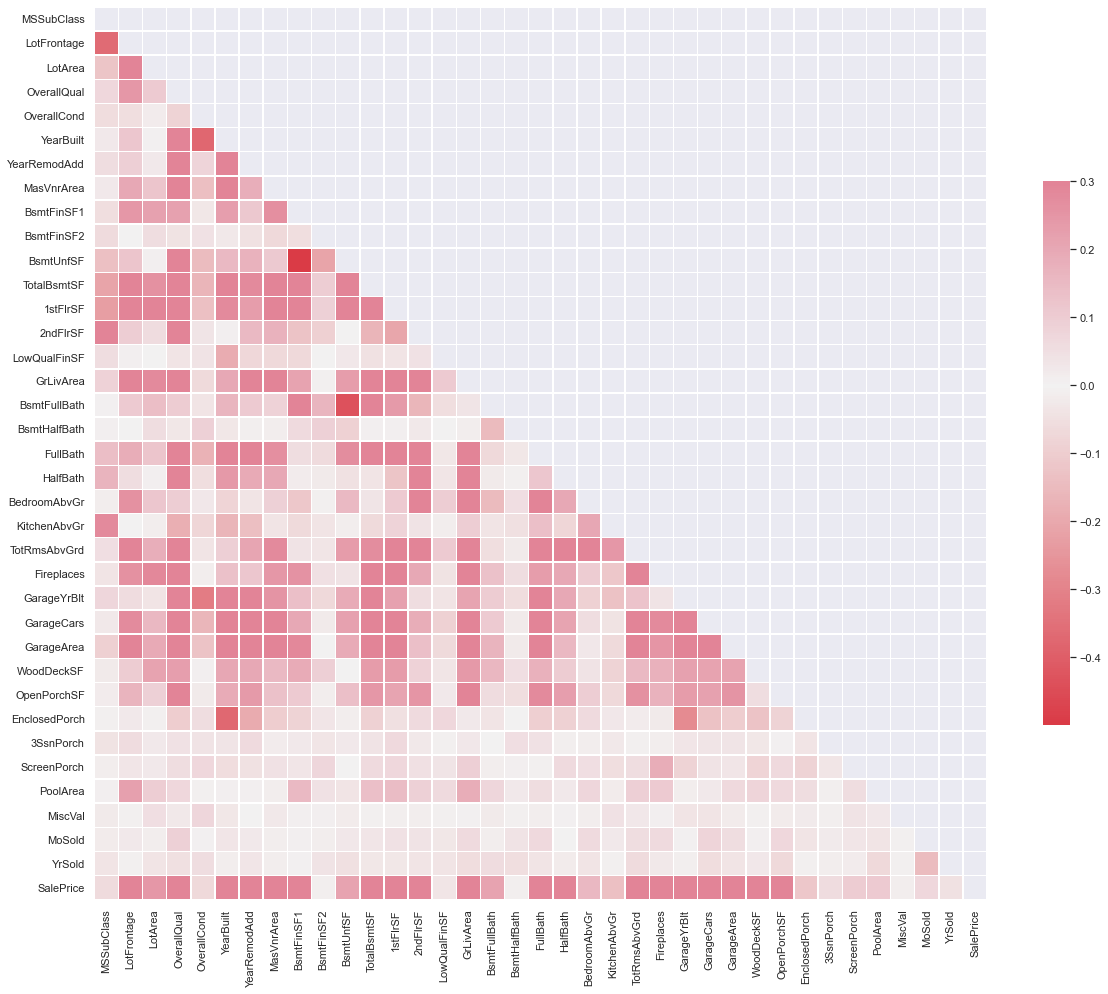

In [30]:
import matplotlib.pyplot as plt
import numpy as np
correlations = train.corr()
sns.set(style='dark')
cmap = sns.diverging_palette(10, 5, as_cmap=True)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Observations:
    
    1.light colour boxes are correlated with target columns.
    
    2. Dark colour boxes are negatively correlated with target columns.
    
    3.Same colour boxes having multi colinear.

<AxesSubplot:>

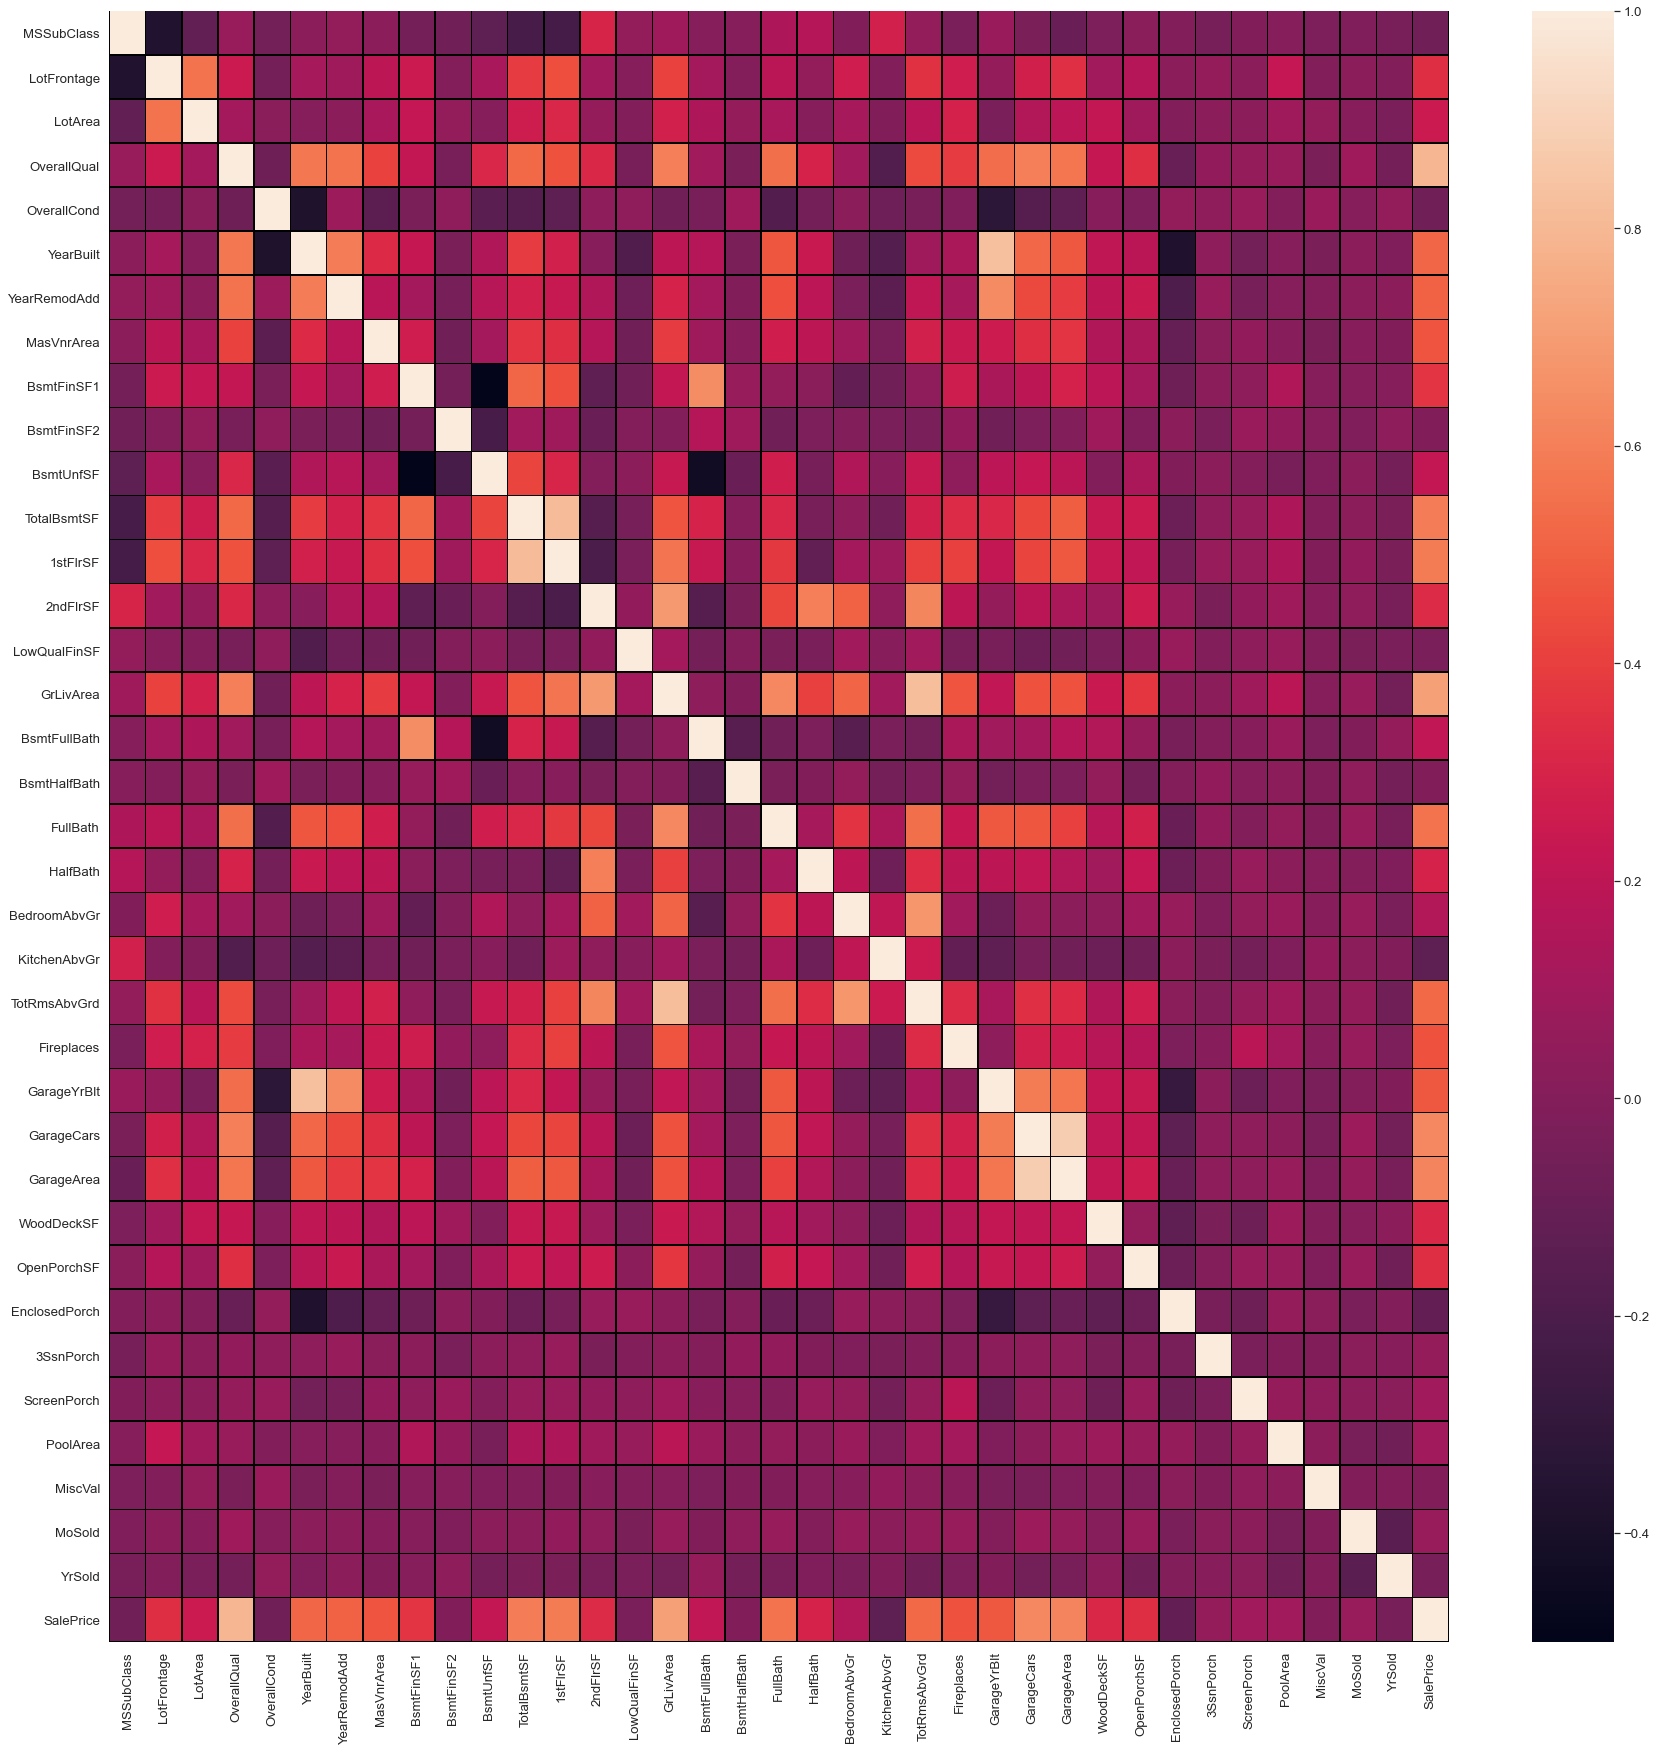

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.set(font_scale=1.2)
sns.heatmap(train.corr(),  linewidths=0.5,linecolor="black", fmt= '.2f')

<AxesSubplot:>

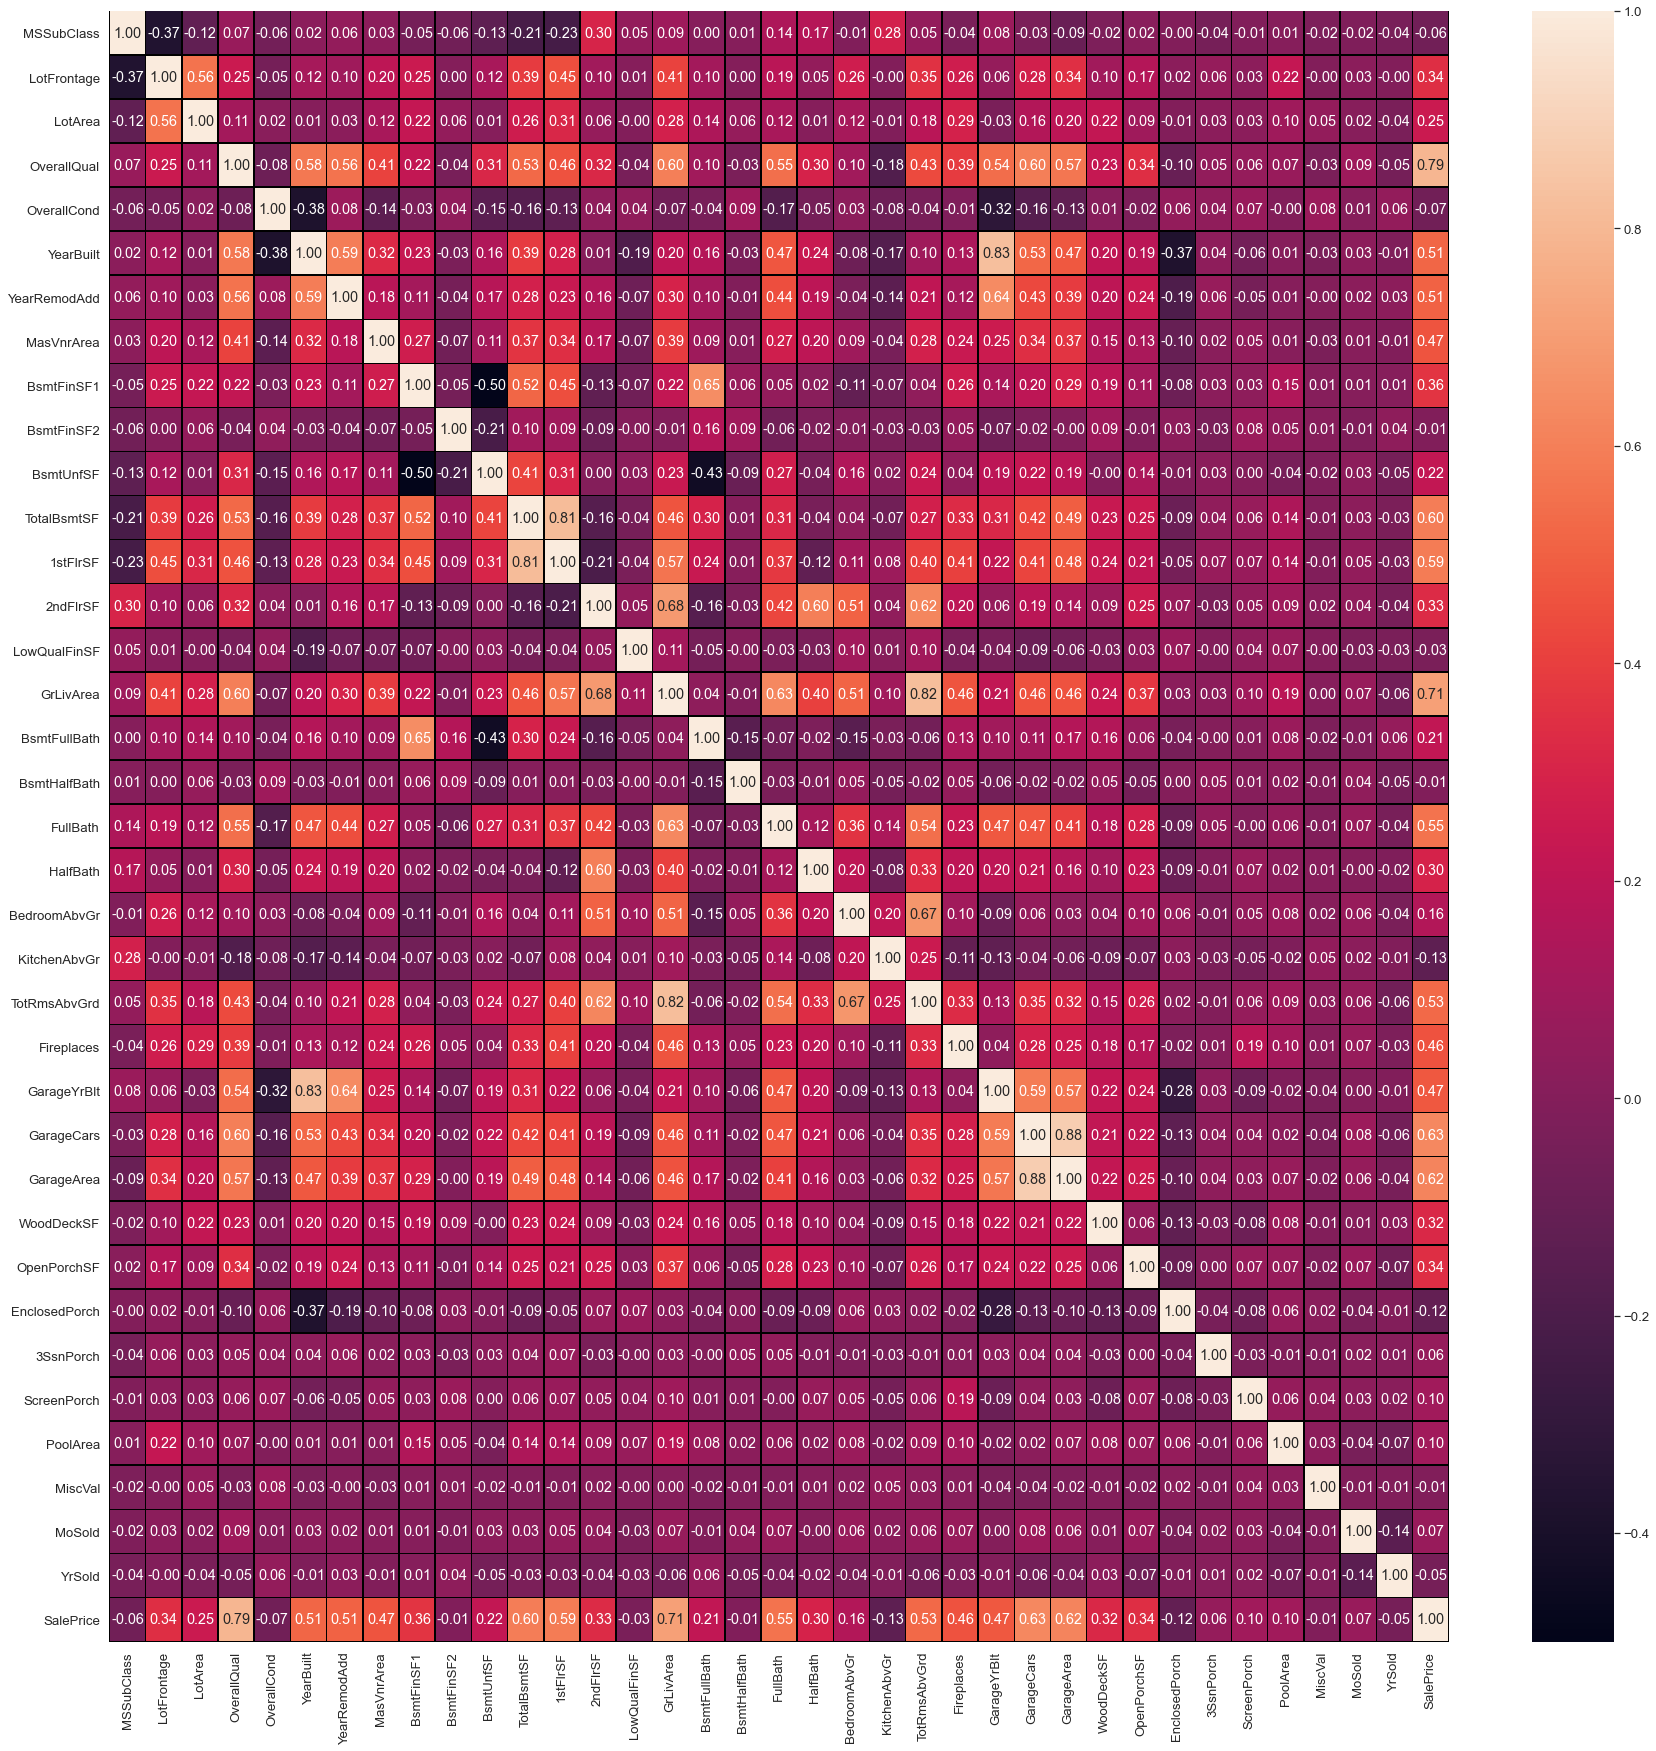

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.set(font_scale=1.2)
sns.heatmap(train.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

# As notations are unable to see,we plot only positive corelated columns with target variables.

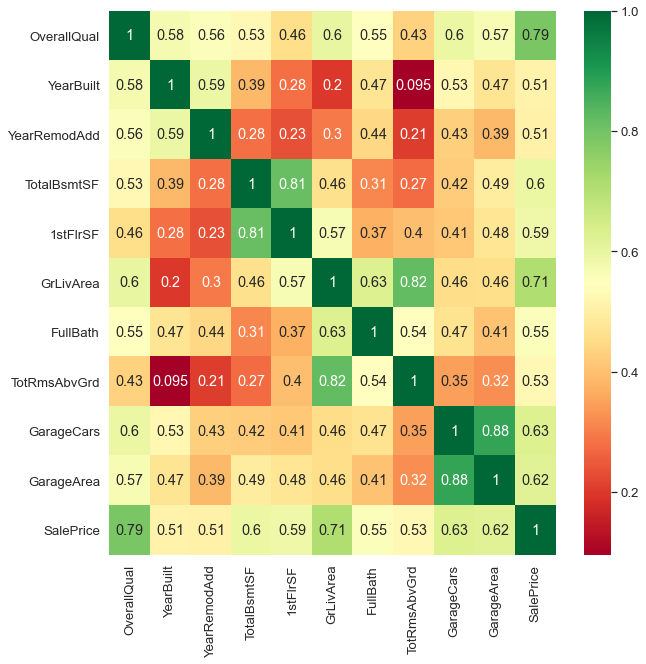

In [33]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
sns.set(font_scale=1)

observations:

    1.Most of the features are correlated with each other like Garage Cars and Garage Area.

    2.OverallQual is highly correlated with target feature SalePrice 0.79 can you see. we'll see     how it effected the saleprice in below graph.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

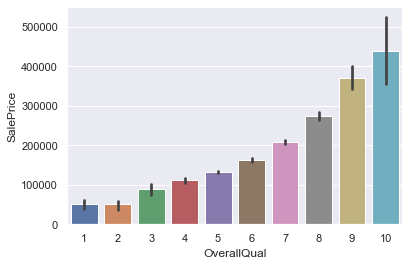

In [34]:
sns.barplot(train.OverallQual,train.SalePrice)

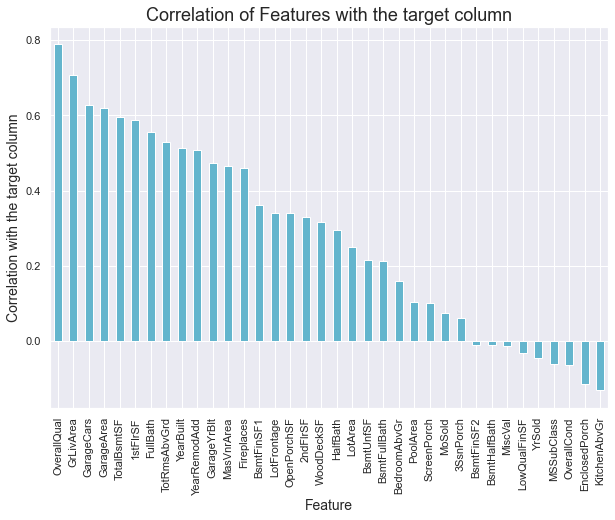

In [35]:
plt.figure(figsize=(10,7))
train.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
sns.set(font_scale=1)
plt.show()


observations:
    
    1.Overall quality ,grlivarea,garagecars are highly correlated with target variables and imapacting more on predicting Sales price.
    
    2.kitchen above grn and enclosed porch are negatively impacting on prediction of Sales prices.

# Discription of dataset

In [36]:
train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000    954.00000    1168.000000  1168.000000  1168.000000   
mean     56.767979     70.98847   10484.749144     6.104452     5.595890   
std      41.940650     24.82875    8957.442311     1.390153     1.124343   
min      20.000000     21.00000    1300.000000     1.000000     1.000000   
25%      20.000000     60.00000    7621.500000     5.000000     5.000000   
50%      50.000000     70.00000    9522.500000     6.000000     5.000000   
75%      70.000000     80.00000   11515.500000     7.000000     6.000000   
max     190.000000    313.00000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1168.000000   1168.000000  1161.000000  1168.000000  1168.000000  ...   
mean   1970.930651   1984.758562   102.310078   444.726027    46.647260  ...   
std      30.145255     20.785185   182.595606   462.664785   163.520016  ...   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000  ...   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000  ...   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

observations:
    
    1. there is difference in 75% and max which means outliers are present.
    
  

# Feature Engineering
Let's take a look at the distribution of the SalePrice.

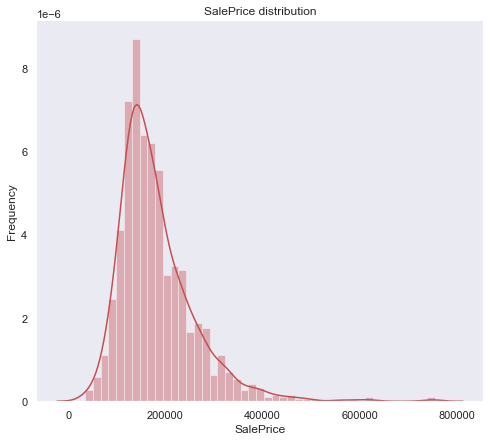

In [37]:
sns.set_style("dark")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice'], color="r");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [38]:
# Skew and kurt
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.953878
Kurtosis: 7.390657


The SalePrice is skewed to the right. This is a problem because most ML models don't do well with non-normally distributed data.

In [39]:
# log(1+x) transform
train["SalePrice"] = np.log1p(train["SalePrice"])

Let's plot the SalePrice again.


 mu = 12.03 and sigma = 0.40



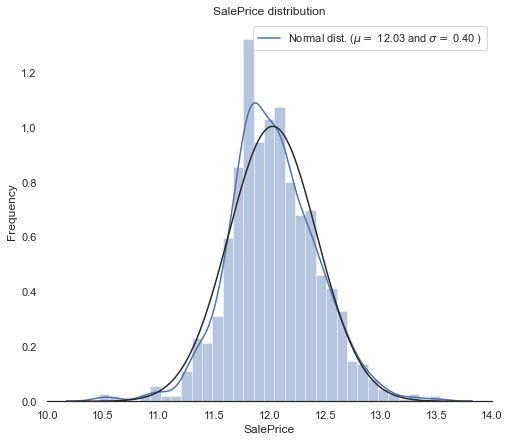

In [40]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

The SalePrice is now normally distributed, excellent!

In [41]:
train.shape

(1168, 80)

In [42]:
train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

<AxesSubplot:>

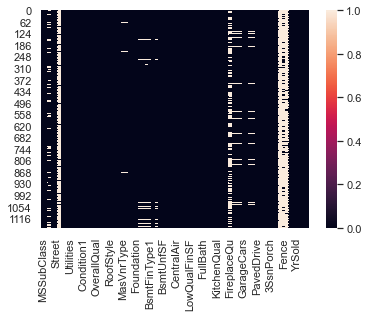

In [43]:
import seaborn as sns
sns.heatmap(train.isnull())

# Observations:
1.From above code we observe that there are lots of white spots which are null values in the dataset.

2.This dataset having all the house amenties , so null values may represent that perticular amenty is absent in the house.

# Missing Values
Null values are silent killer, so we have to drop or fill them with appropriate,mean,median and mode.

In [44]:
#lets cheak which feature column having maximum no Null values.

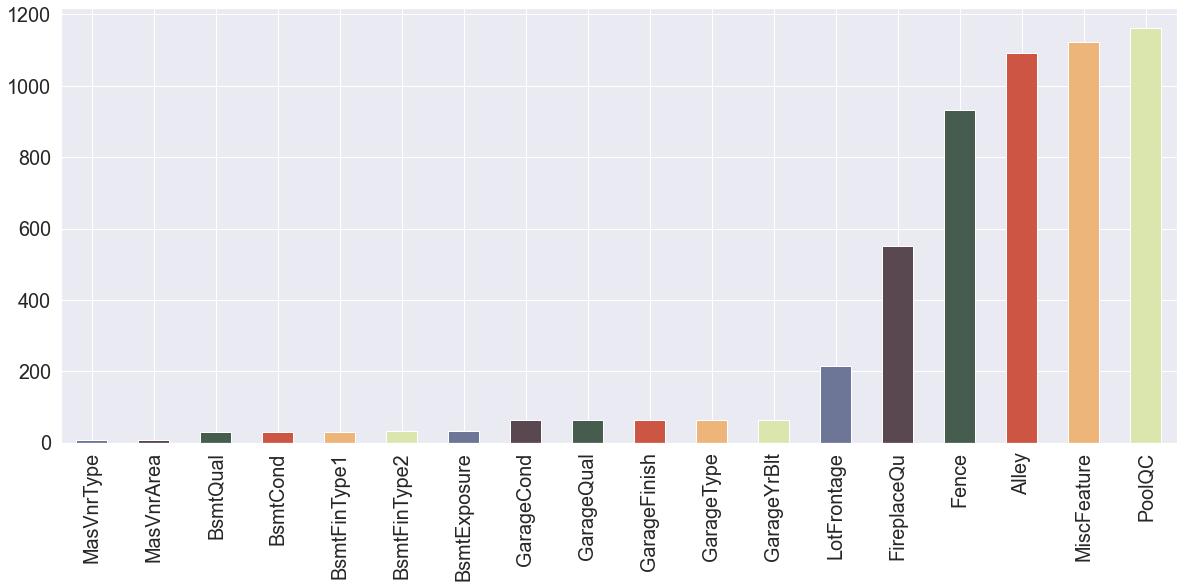

In [45]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
sns.set(font_scale=1.8)
missing = train.isnull().sum() 
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color=colors);

In [46]:
a = train.isnull().sum() / 1168*100
a.sort_values(ascending=False).head(16)

PoolQC          99.400685
MiscFeature     96.232877
Alley           93.407534
Fence           79.708904
FireplaceQu     47.174658
LotFrontage     18.321918
GarageType       5.479452
GarageFinish     5.479452
GarageQual       5.479452
GarageCond       5.479452
GarageYrBlt      5.479452
BsmtExposure     2.654110
BsmtFinType2     2.654110
BsmtCond         2.568493
BsmtFinType1     2.568493
BsmtQual         2.568493
dtype: float64

# Criteria for processing missing values include deletion and replacement.
'Delete method' deletes the columns in which missing values exist in the simplest and cleanest way.

In this competition, Rows should not be deleted because missing values may exist in the test data.

The condition that a column can be deleted is that more than 15% of the column is missing or does not affect the analysis at all.

replacements is an option that should be considered before deletion.

Simple replacements are again specific value replacements and mean value replacements (average, median, mod, regression), and simple probability replacements (hot deck, cold deck).

'specific value replacements' is possible when there is background knowledge that missing values have some meaning.

It can be applied mainly to categorical variables. ex) All other values are recorded, but only specific values are recorded.

In this case, these values usually correspond to special cases or negative meanings or it may be a value that may be reluctant to check.

In this case, the rate of missing values is usually abnormally high. Therefore, if you read the explanation of the variable and fall under the above situation, It replaces it with a specific value.

The mean value replacement is applied to continuous variables and is used when missing values can be inferred through values of other variables.

In [47]:
train = train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

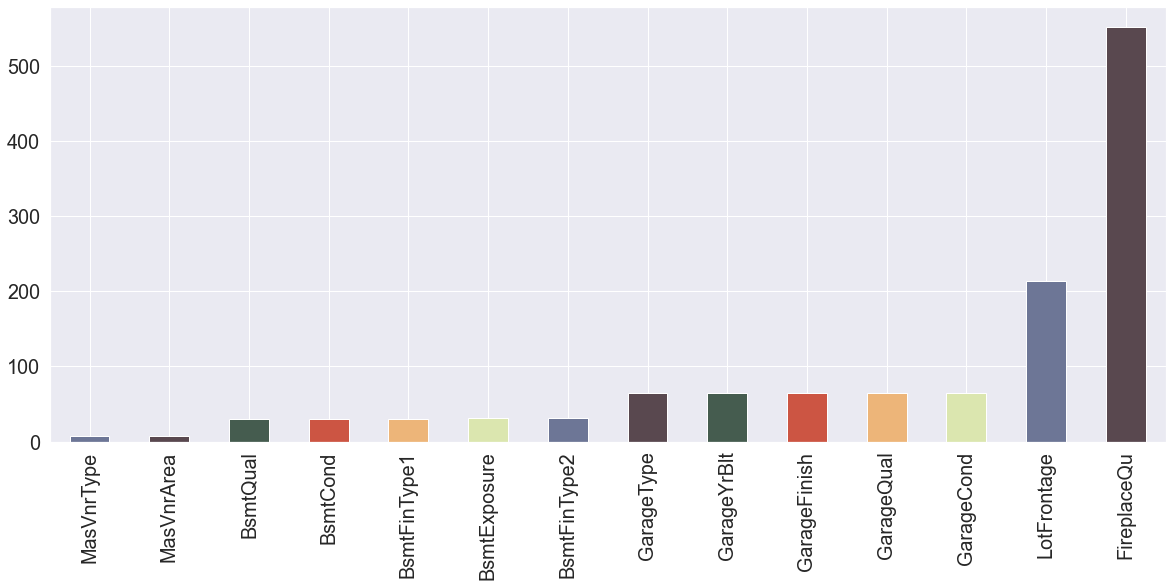

In [48]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
sns.set(font_scale=1.8)
missing = train.isnull().sum() 
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color=colors);

In [49]:
a = train.isnull().sum() / 1168*100
a.sort_values(ascending=False).head(16)

FireplaceQu     47.174658
LotFrontage     18.321918
GarageCond       5.479452
GarageType       5.479452
GarageYrBlt      5.479452
GarageFinish     5.479452
GarageQual       5.479452
BsmtExposure     2.654110
BsmtFinType2     2.654110
BsmtFinType1     2.568493
BsmtCond         2.568493
BsmtQual         2.568493
MasVnrArea       0.599315
MasVnrType       0.599315
LotConfig        0.000000
LandSlope        0.000000
dtype: float64

Observations:

1.We drop feature columns where null values are more that 50%. 

In [50]:
# specific value replacements

train["FireplaceQu"] = train["FireplaceQu"].fillna("None")

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')

train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
train["Functional"] = train["Functional"].fillna("Typ")
train['MSSubClass'] = train['MSSubClass'].fillna("None")

All of the above missing values were replaced with specific values. The reason is that we found that their missing values mean Nan or some specific value.

In [51]:
# mean value replacements
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])

train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

The above missing values are continuous variables and have been replaced with the poorest values.

Lot Frontage' will be similar to the value of nearby houses, so it has been replaced with a median value.

In [52]:
train.drop(['Utilities'], axis=1, inplace=True)

'Utilities', 'Condition2', 'RoofMatl', 'Heating' are biased variables.

They are removed because they are variables that did not significantly affect the analysis.

GarageArea, 1stFlrSF are also removed .

In [53]:
# Complete
train.isnull().sum().sum()

0

<AxesSubplot:>

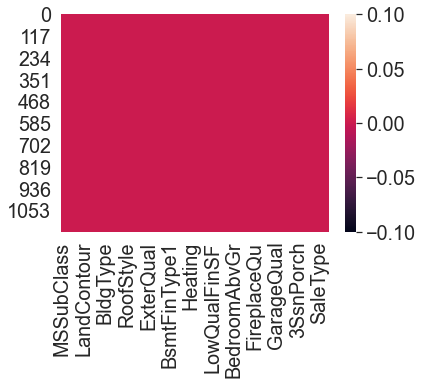

In [54]:
import seaborn as sns
sns.heatmap(train.isnull())

Observations:

1. From above heatmap we easily observe that there is no null values are present in the dataset.

In [55]:
train.head(10)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL         24.0     4928   Pave      IR1         Lvl   
1          20       RL         95.0    15865   Pave      IR1         Lvl   
2          60       RL         92.0     9920   Pave      IR1         Lvl   
3          20       RL        105.0    11751   Pave      IR1         Lvl   
4          20       RL         80.0    16635   Pave      IR1         Lvl   
5          60       RL         58.0    14054   Pave      IR1         Lvl   
6          20       RL         72.0    11341   Pave      IR1         Lvl   
7          20       RL         88.0    13125   Pave      Reg         Lvl   
8          20       RL         70.0     9170   Pave      Reg         Lvl   
9          50       RL         80.0     8480   Pave      Reg         Lvl   

  LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    Inside       Gtl      NPkVill  ...             0         0           0   
1    Inside       Mod        NAmes  ...             0         0         224   
2   CulDSac       Gtl      NoRidge  ...             0         0           0   
3    Inside       Gtl       NWAmes  ...             0         0           0   
4       FR2       Gtl       NWAmes  ...             0         0           0   
5    Inside       Gtl      Gilbert  ...             0         0           0   
6    Inside       Gtl       Sawyer  ...             0         0          95   
7    Corner       Gtl       Sawyer  ...             0         0           0   
8    Corner       Gtl      Edwards  ...           184         0           0   
9    Inside       Gtl        NAmes  ...           102         0           0   

  PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  SalePrice  
0        0        0       2    2007        WD        Normal  11.759793  
1        0        0      10    2007        WD        Normal  12.498746  
2        0        0       6    2007        WD        Normal  12.505403  
3        0        0       1    2010       COD        Normal  12.154785  
4        0        0       6    2009        WD        Normal  12.278398  
5        0        0      11    2006       New       Partial  12.297790  
6        0        0       5    2010        WD        Normal  11.707678  
7        0        0       1    2006        WD        Normal  11.951187  
8        0      400       4    2007        WD        Normal  11.849405  
9        0        0      10    2008       COD       Abnorml  11.682677  

[10 rows x 75 columns]

In [56]:
train.shape

(1168, 75)

In [57]:
features = [col for col in train.columns if col not in ['Id','SalePrice']]
print(features)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Sale

In [58]:
numerical_cols = [col for col in features if train[col].dtypes !='O']
print(numerical_cols)
len(numerical_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


36

In [59]:
categorical_cols = [col for col in features if train[col].dtypes =='O']
print(categorical_cols)
len(categorical_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


38

Now its time to Encode the Categorical Data Present in the dataset.We are using Label Encoder for each variable.

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [61]:
train['MSZoning'] = le.fit_transform(train['MSZoning'])
train['Street'] = le.fit_transform(train['Street'])
train['LotShape'] = le.fit_transform(train['LotShape'])
train['LandContour'] = le.fit_transform(train['LandContour'])
train['LotConfig'] = le.fit_transform(train['LotConfig'])
train['LandSlope'] = le.fit_transform(train['LandSlope'])
train['Neighborhood'] = le.fit_transform(train['Neighborhood'])
train['Condition1'] = le.fit_transform(train['Condition1'])
train['Condition2'] = le.fit_transform(train['Condition2'])
train['BldgType'] = le.fit_transform(train['BldgType'])
train['HouseStyle'] = le.fit_transform(train['HouseStyle'])
train['RoofStyle'] = le.fit_transform(train['RoofStyle'])
train['Exterior1st'] = le.fit_transform(train['Exterior1st'])
train['Exterior2nd'] = le.fit_transform(train['Exterior2nd'])
train['MasVnrType'] = le.fit_transform(train['MasVnrType'])
train['ExterQual'] = le.fit_transform(train['ExterQual'])
train['Foundation'] = le.fit_transform(train['Foundation'])
train['BsmtQual'] = le.fit_transform(train['BsmtQual'])
train['BsmtCond'] = le.fit_transform(train['BsmtCond'])
train['BsmtExposure'] = le.fit_transform(train['BsmtExposure'])
train['BsmtFinType1'] = le.fit_transform(train['BsmtFinType1'])
train['BsmtFinType2'] = le.fit_transform(train['BsmtFinType2'])
train['Heating'] = le.fit_transform(train['Heating'])
train['CentralAir'] = le.fit_transform(train['CentralAir'])
train['Electrical'] = le.fit_transform(train['Electrical'])
train['KitchenQual'] = le.fit_transform(train['KitchenQual'])
train['Functional'] = le.fit_transform(train['Functional'])
train['FireplaceQu'] = le.fit_transform(train['FireplaceQu'])
train['GarageType'] = le.fit_transform(train['GarageType'])
train['GarageFinish'] = le.fit_transform(train['GarageFinish'])
train['GarageQual'] = le.fit_transform(train['GarageQual'])
train['GarageCond'] = le.fit_transform(train['GarageCond'])
train['PavedDrive'] = le.fit_transform(train['PavedDrive'])
train['Exterior2nd'] = le.fit_transform(train['Exterior2nd'])
train['SaleType'] = le.fit_transform(train['SaleType'])
train['SaleCondition'] = le.fit_transform(train['SaleCondition'])
train['ExterCond'] = le.fit_transform(train['ExterCond'])
train['RoofMatl'] = le.fit_transform(train['RoofMatl'])
train['HeatingQC'] = le.fit_transform(train['HeatingQC'])

In [62]:
train.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0         120         3         24.0     4928       1         0            3   
1          20         3         95.0    15865       1         0            3   
2          60         3         92.0     9920       1         0            3   
3          20         3        105.0    11751       1         0            3   
4          20         3         80.0    16635       1         0            3   

   LotConfig  LandSlope  Neighborhood  ...  EnclosedPorch  3SsnPorch  \
0          4          0            13  ...              0          0   
1          4          1            12  ...              0          0   
2          1          0            15  ...              0          0   
3          4          0            14  ...              0          0   
4          2          0            14  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       2    2007         8              4   
1          224         0        0      10    2007         8              4   
2            0         0        0       6    2007         8              4   
3            0         0        0       1    2010         0              4   
4            0         0        0       6    2009         8              4   

   SalePrice  
0  11.759793  
1  12.498746  
2  12.505403  
3  12.154785  
4  12.278398  

[5 rows x 75 columns]

Observations:

All the categorical columns are converted to int datatypes.

# Cheak the skewness:
Now use subplot and displot to check data are normalised or not.

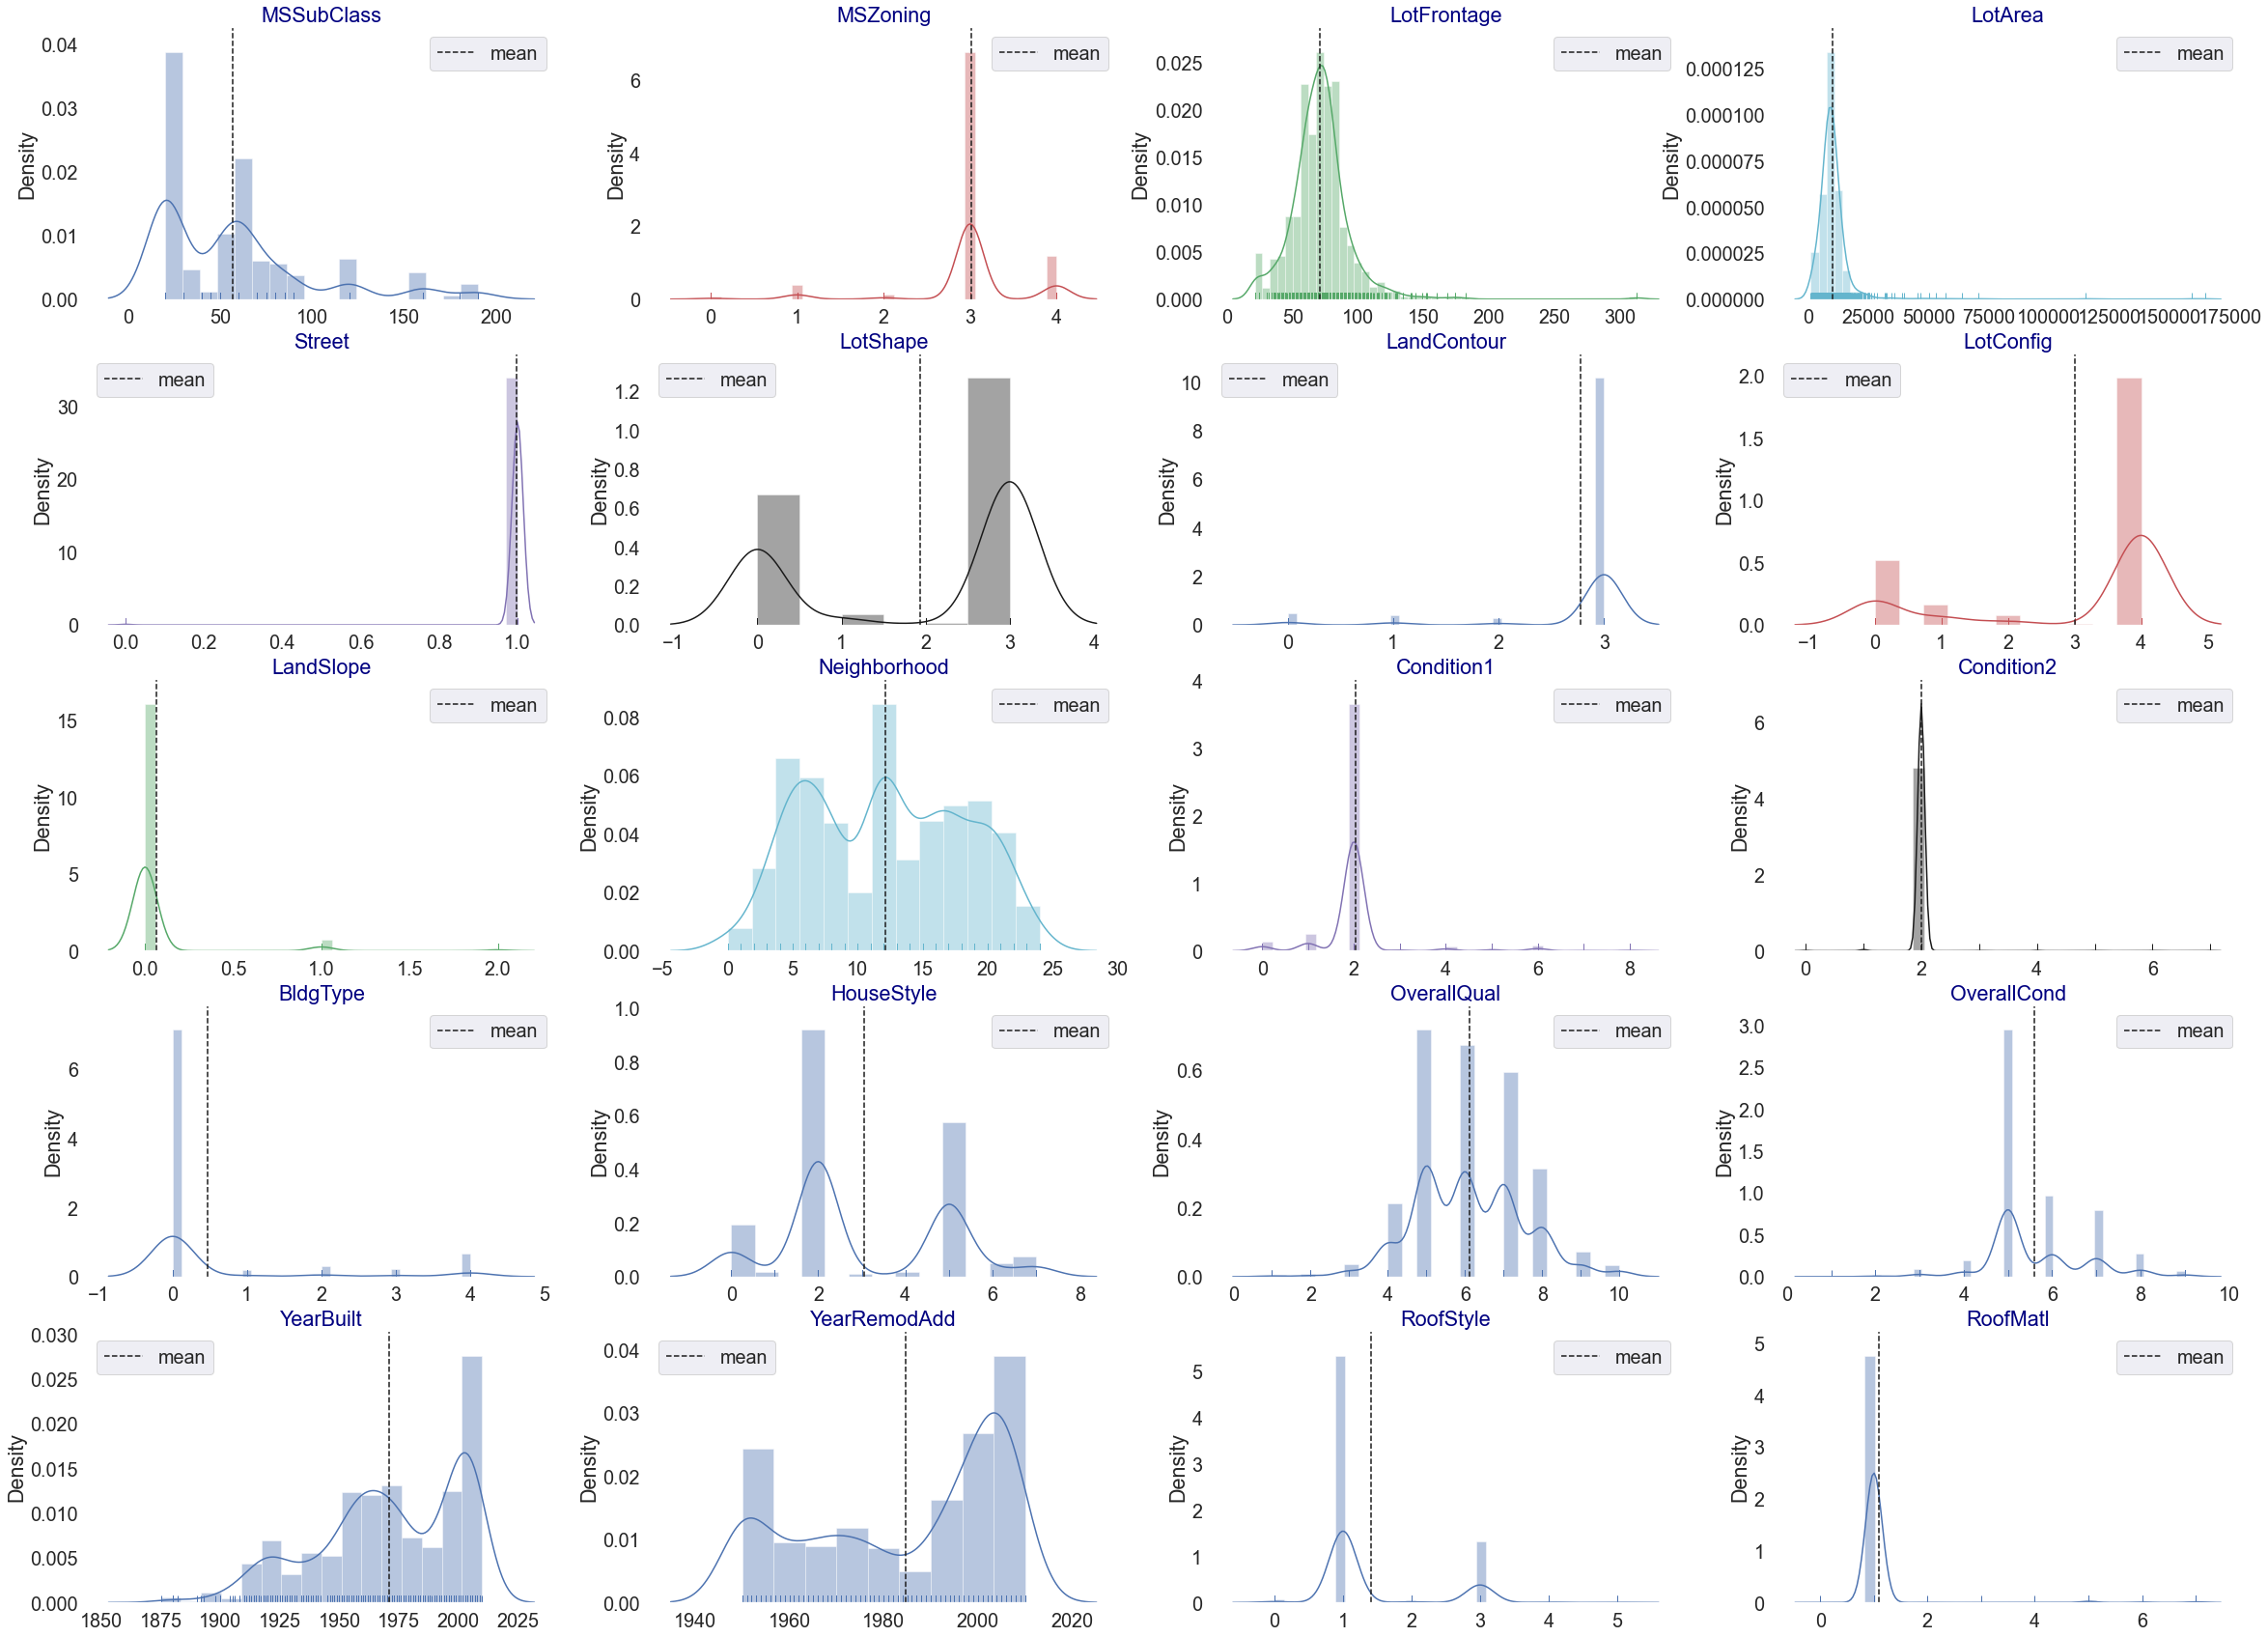

In [63]:
import itertools
import matplotlib.pyplot as plt
cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl']
length = len(cols)
cs = ["b","r","g","c","m","k","b","r","g","c","m","k","b"]
fig = plt.figure(figsize=(40,30))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(5,4,j+1)
    ax = sns.distplot(train[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(train[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observations:

1. From above plotting of distribution plot we see that some features columns are not normally distributed.

2. some columns are skewed towards right.

3. Building blocks are out of the normal curve hence outliers are present.

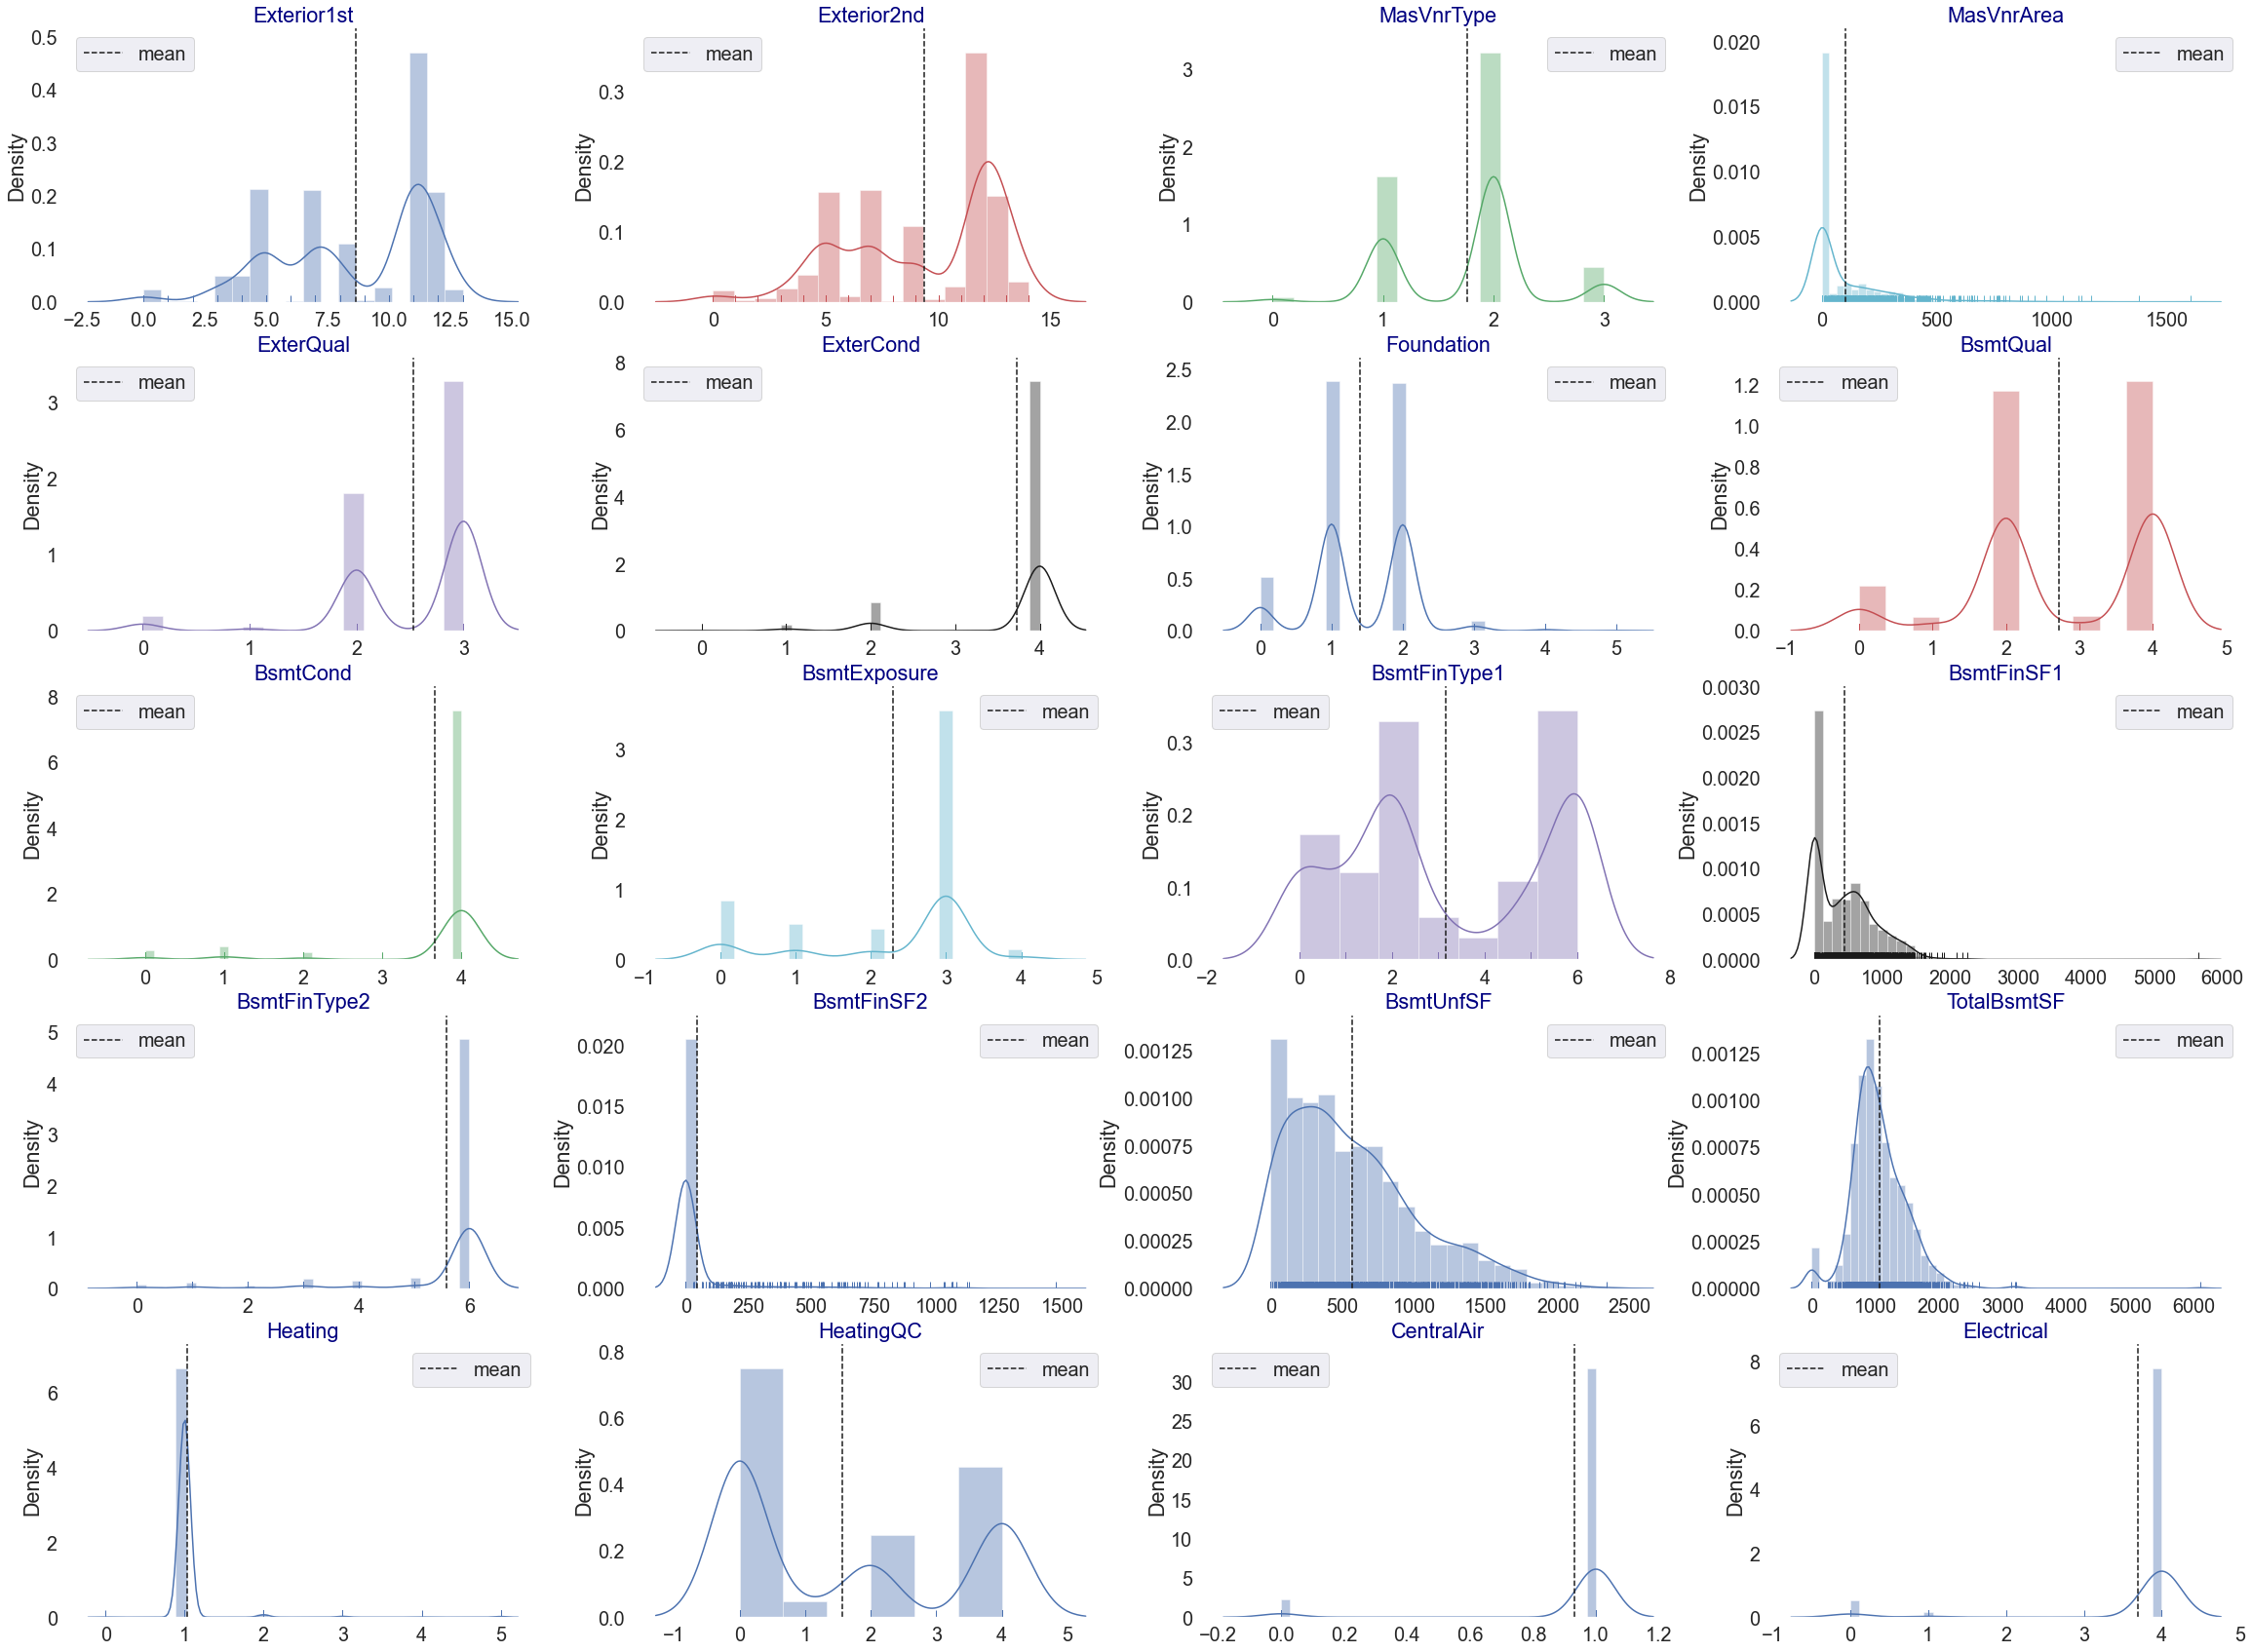

In [64]:
import itertools
import matplotlib.pyplot as plt
cols = ['Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       ]
length = len(cols)
cs = ["b","r","g","c","m","k","b","r","g","c","m","k","b"]
fig = plt.figure(figsize=(40,30))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(5,4,j+1)
    ax = sns.distplot(train[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(train[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observations:

1. From above plotting of distribution plot we see that some features columns are not normally distributed.

2. some columns are skewed towards right.

3. Building blocks are out of the normal curve hence outliers are present.

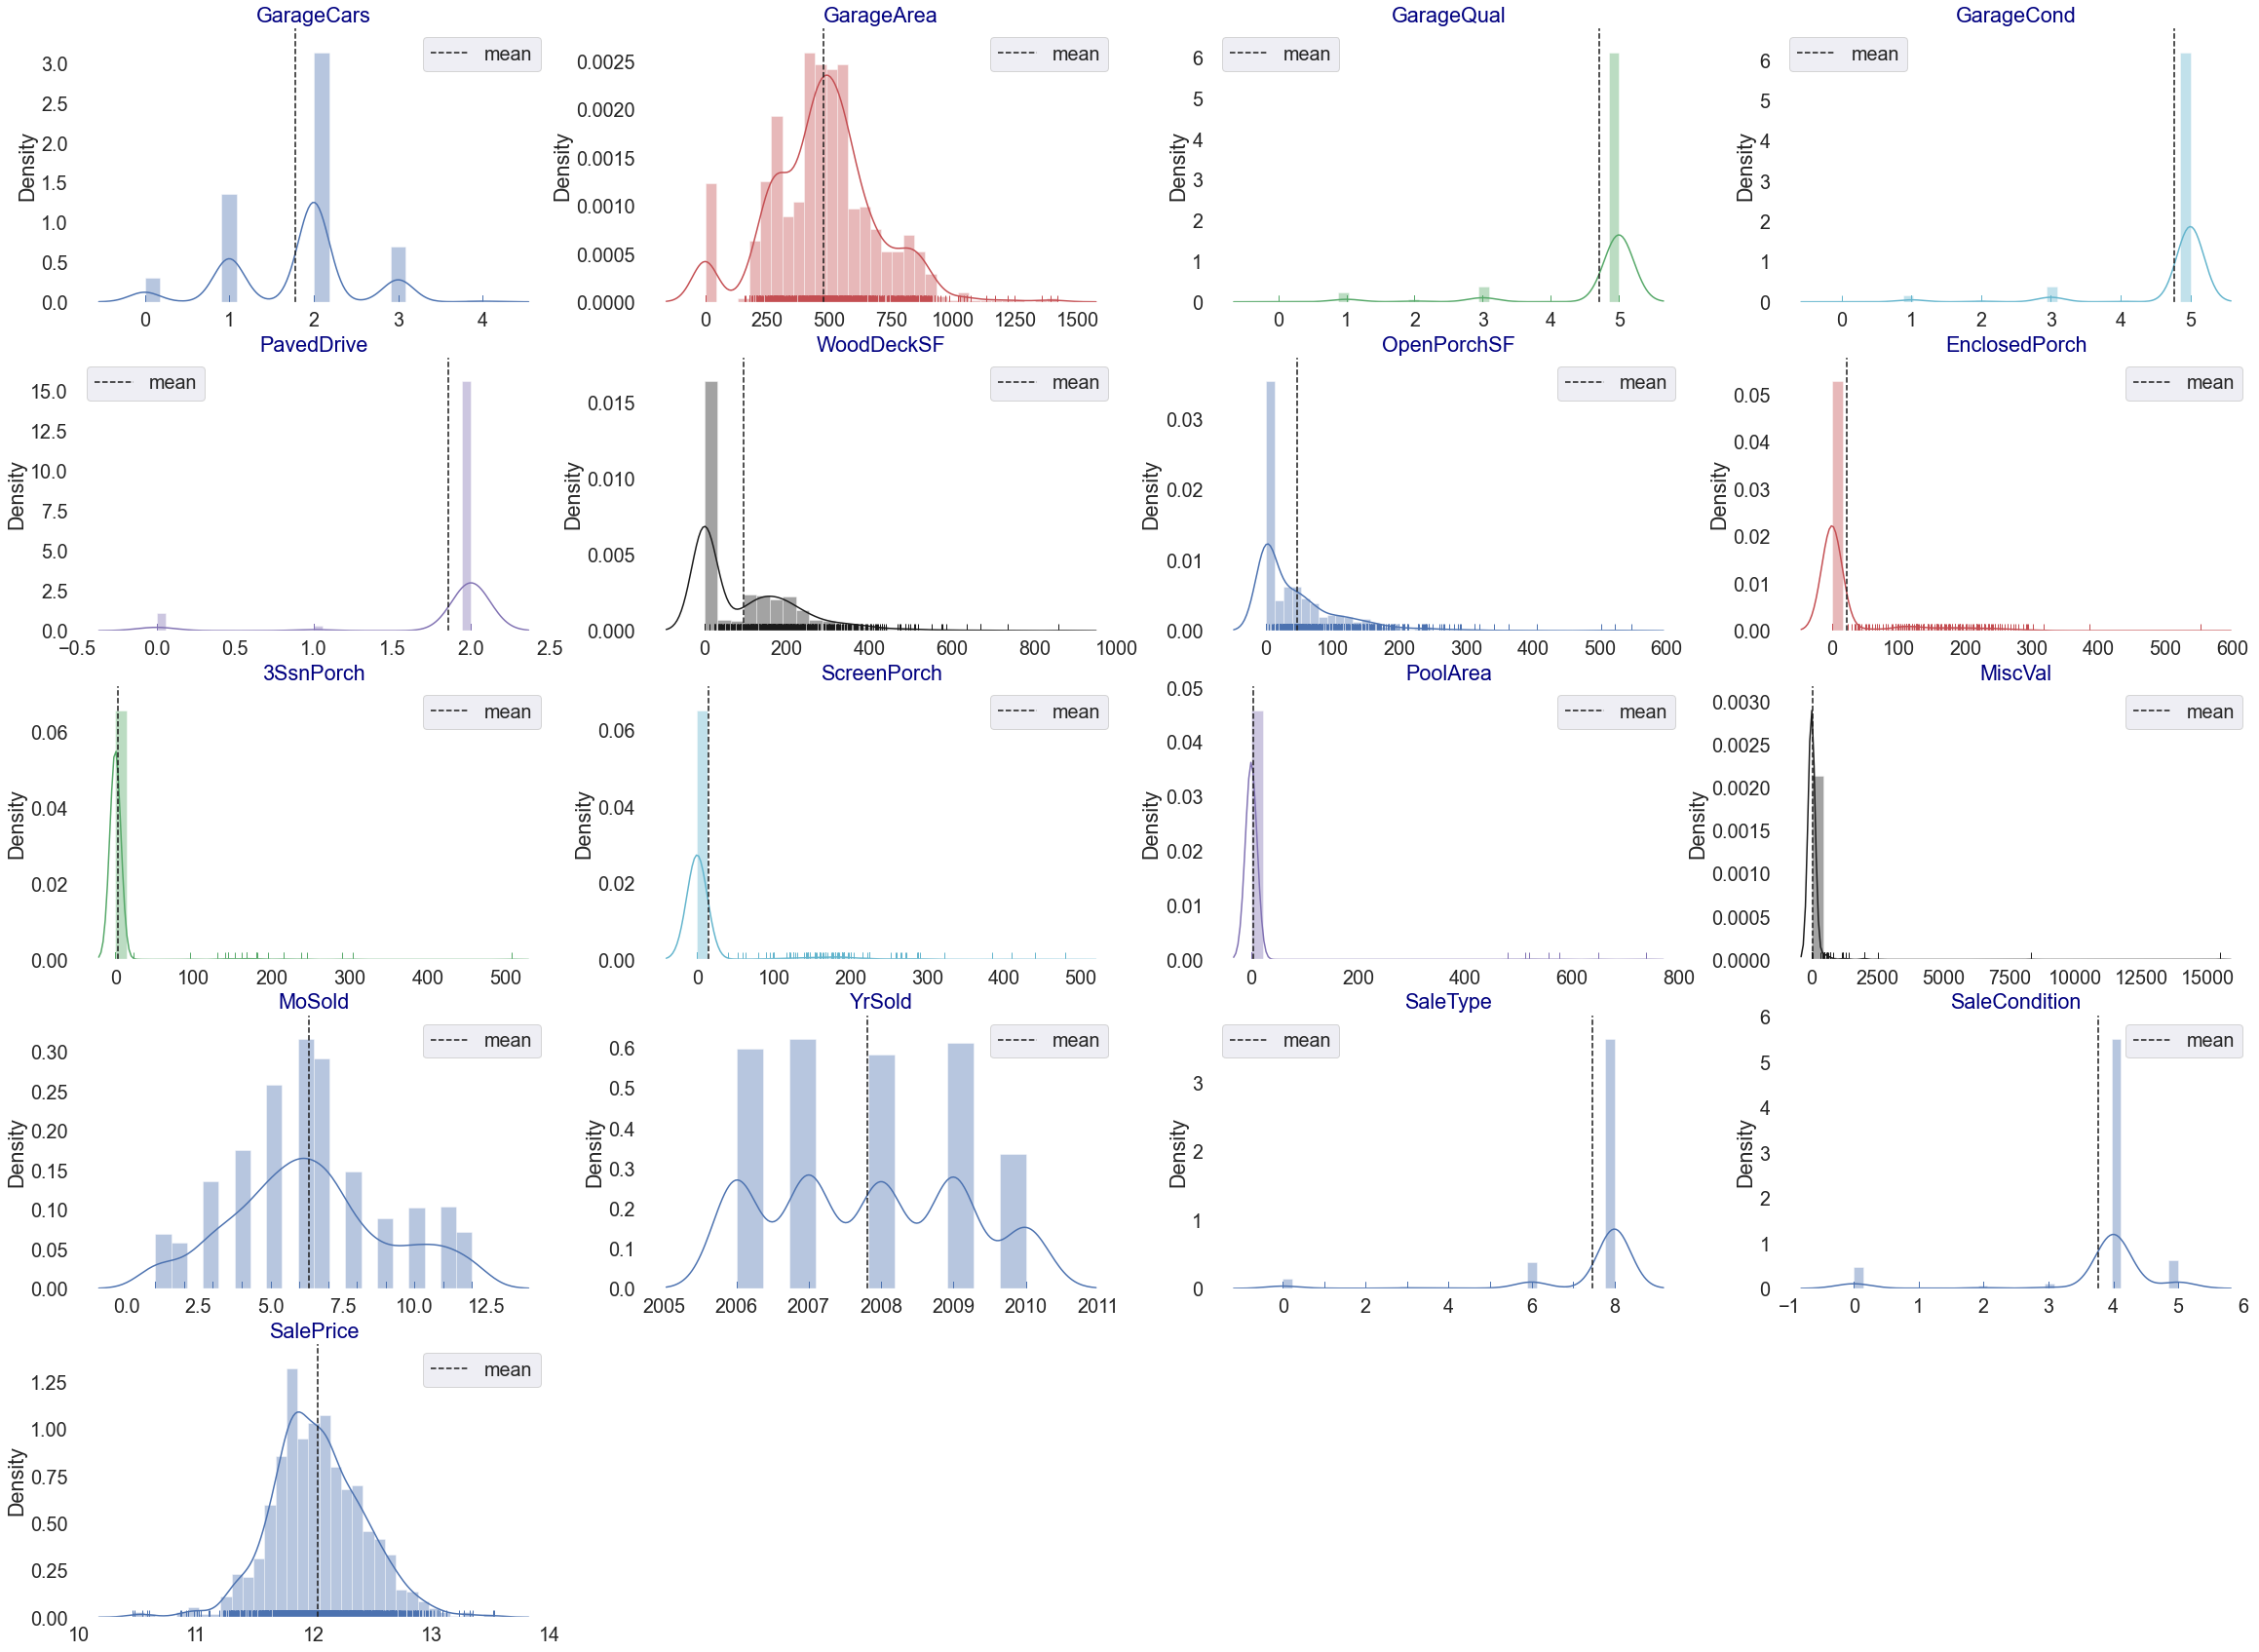

In [65]:
import itertools
import matplotlib.pyplot as plt
cols = ['GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'
       ]
length = len(cols)
cs = ["b","r","g","c","m","k","b","r","g","c","m","k","b"]
fig = plt.figure(figsize=(40,30))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(5,4,j+1)
    ax = sns.distplot(train[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(train[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observations:

1. From above plotting of distribution plot we see that some features columns are not normally distributed.

2. some columns are skewed towards right.

3. Building blocks are out of the normal curve hence outliers are present.

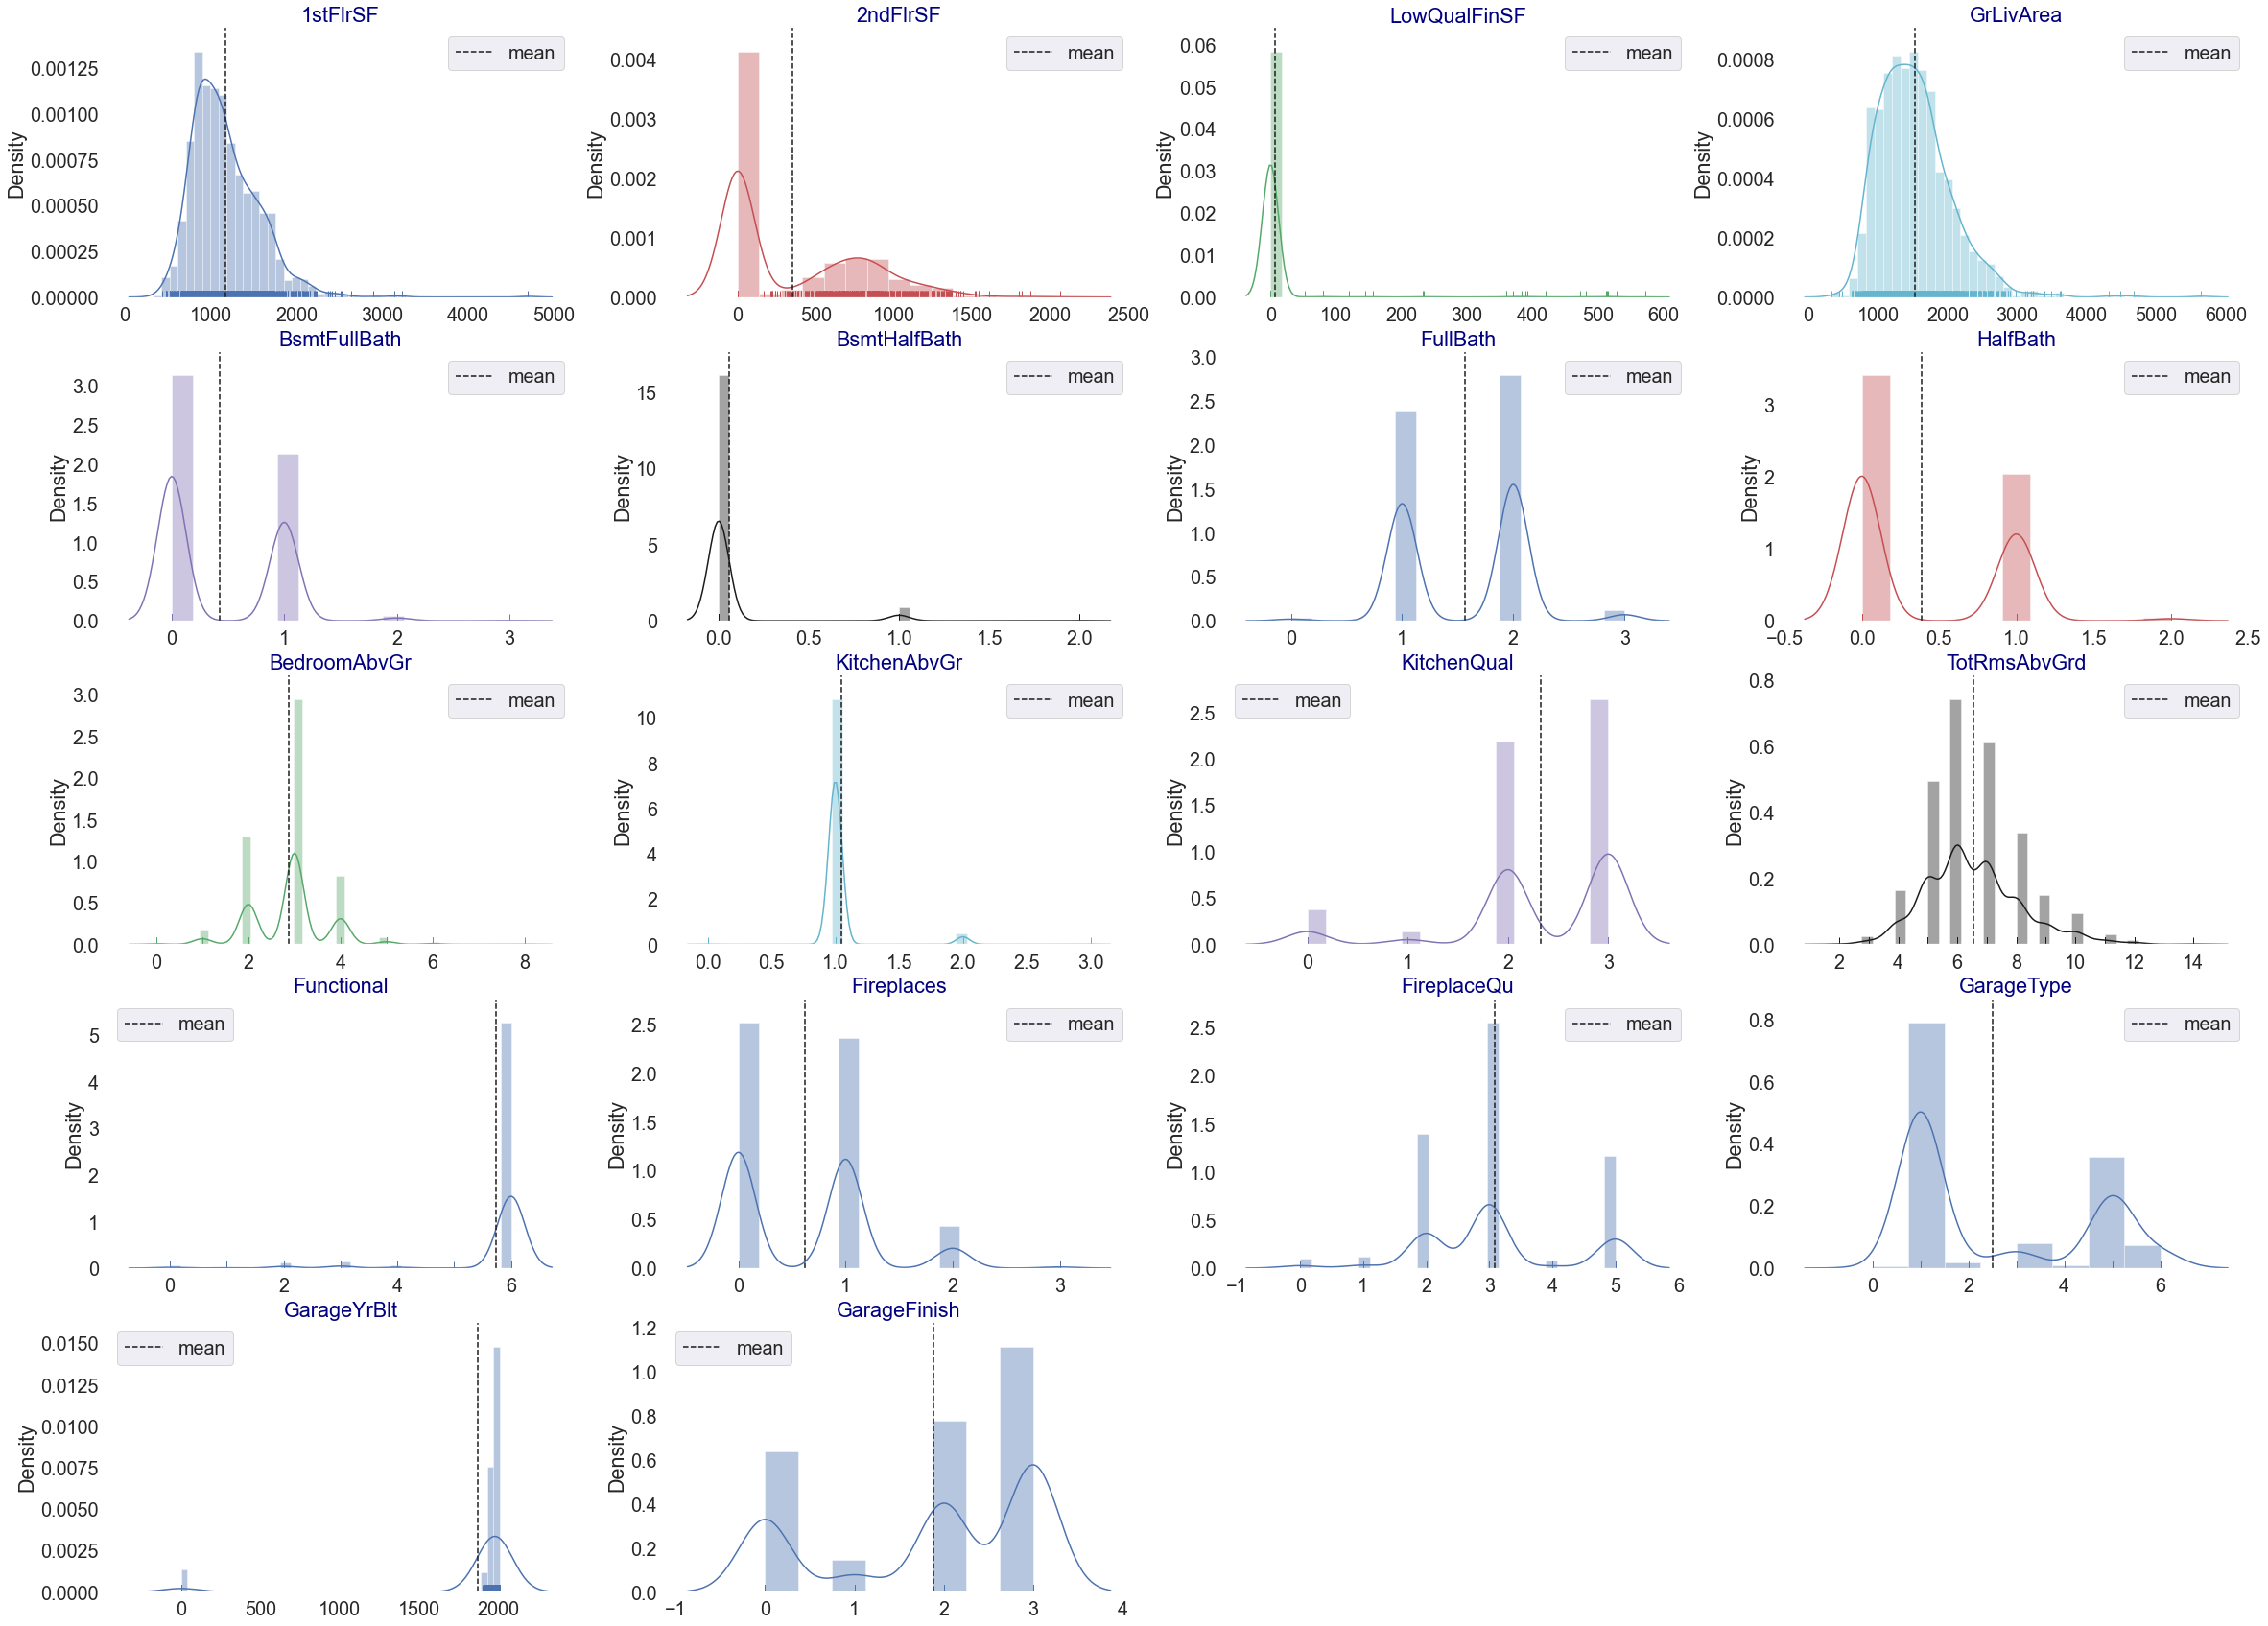

In [66]:
import itertools
import matplotlib.pyplot as plt
cols = ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish']
length = len(cols)
cs = ["b","r","g","c","m","k","b","r","g","c","m","k","b"]
fig = plt.figure(figsize=(40,30))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(5,4,j+1)
    ax = sns.distplot(train[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(train[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observations:

1. From above plotting of distribution plot we see that some features columns are not normally distributed.

2. some columns are skewed towards right.

3. Building blocks are out of the normal curve hence outliers are present.

In [67]:
train.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.514055
LotArea          10.659285
Street          -17.021969
LotShape         -0.603775
LandContour      -3.125982
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrType       -0.104609
MasVnrArea        2.835718
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -0.487530
BsmtCond         -2.816444
BsmtExposure     -1.075098
BsmtFinType1      0.100811
BsmtFinSF1        1.871606
BsmtFinType2     -3.144813
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
Heating          10.103609
H

# Detecting outliers:

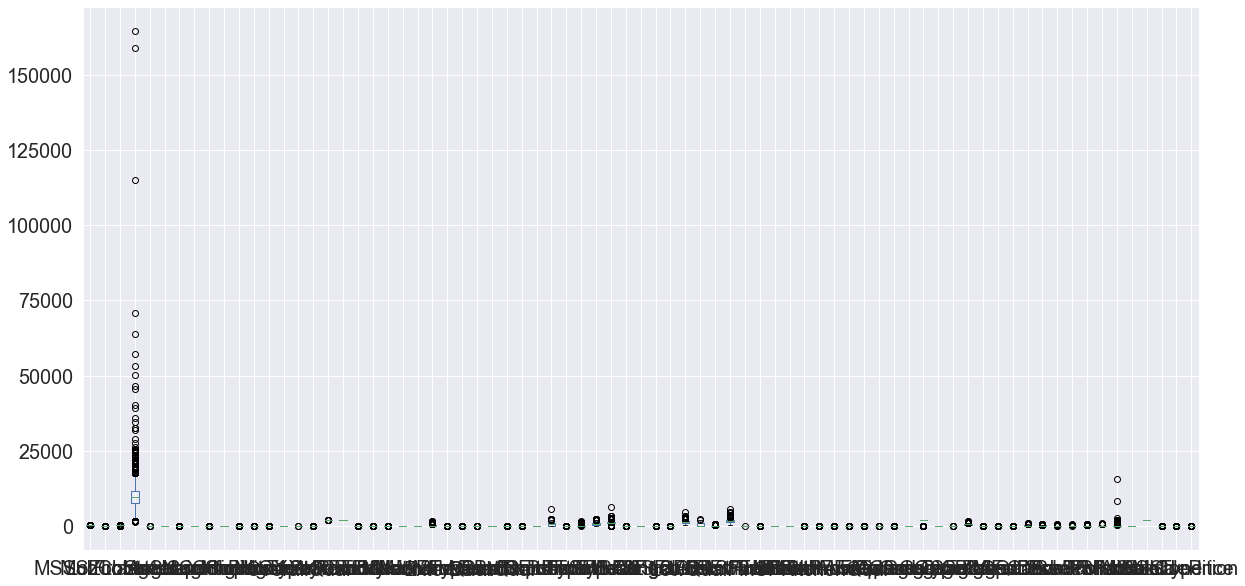

In [70]:
train.plot.box(figsize=(20,10))
sns.set(font_scale=1)

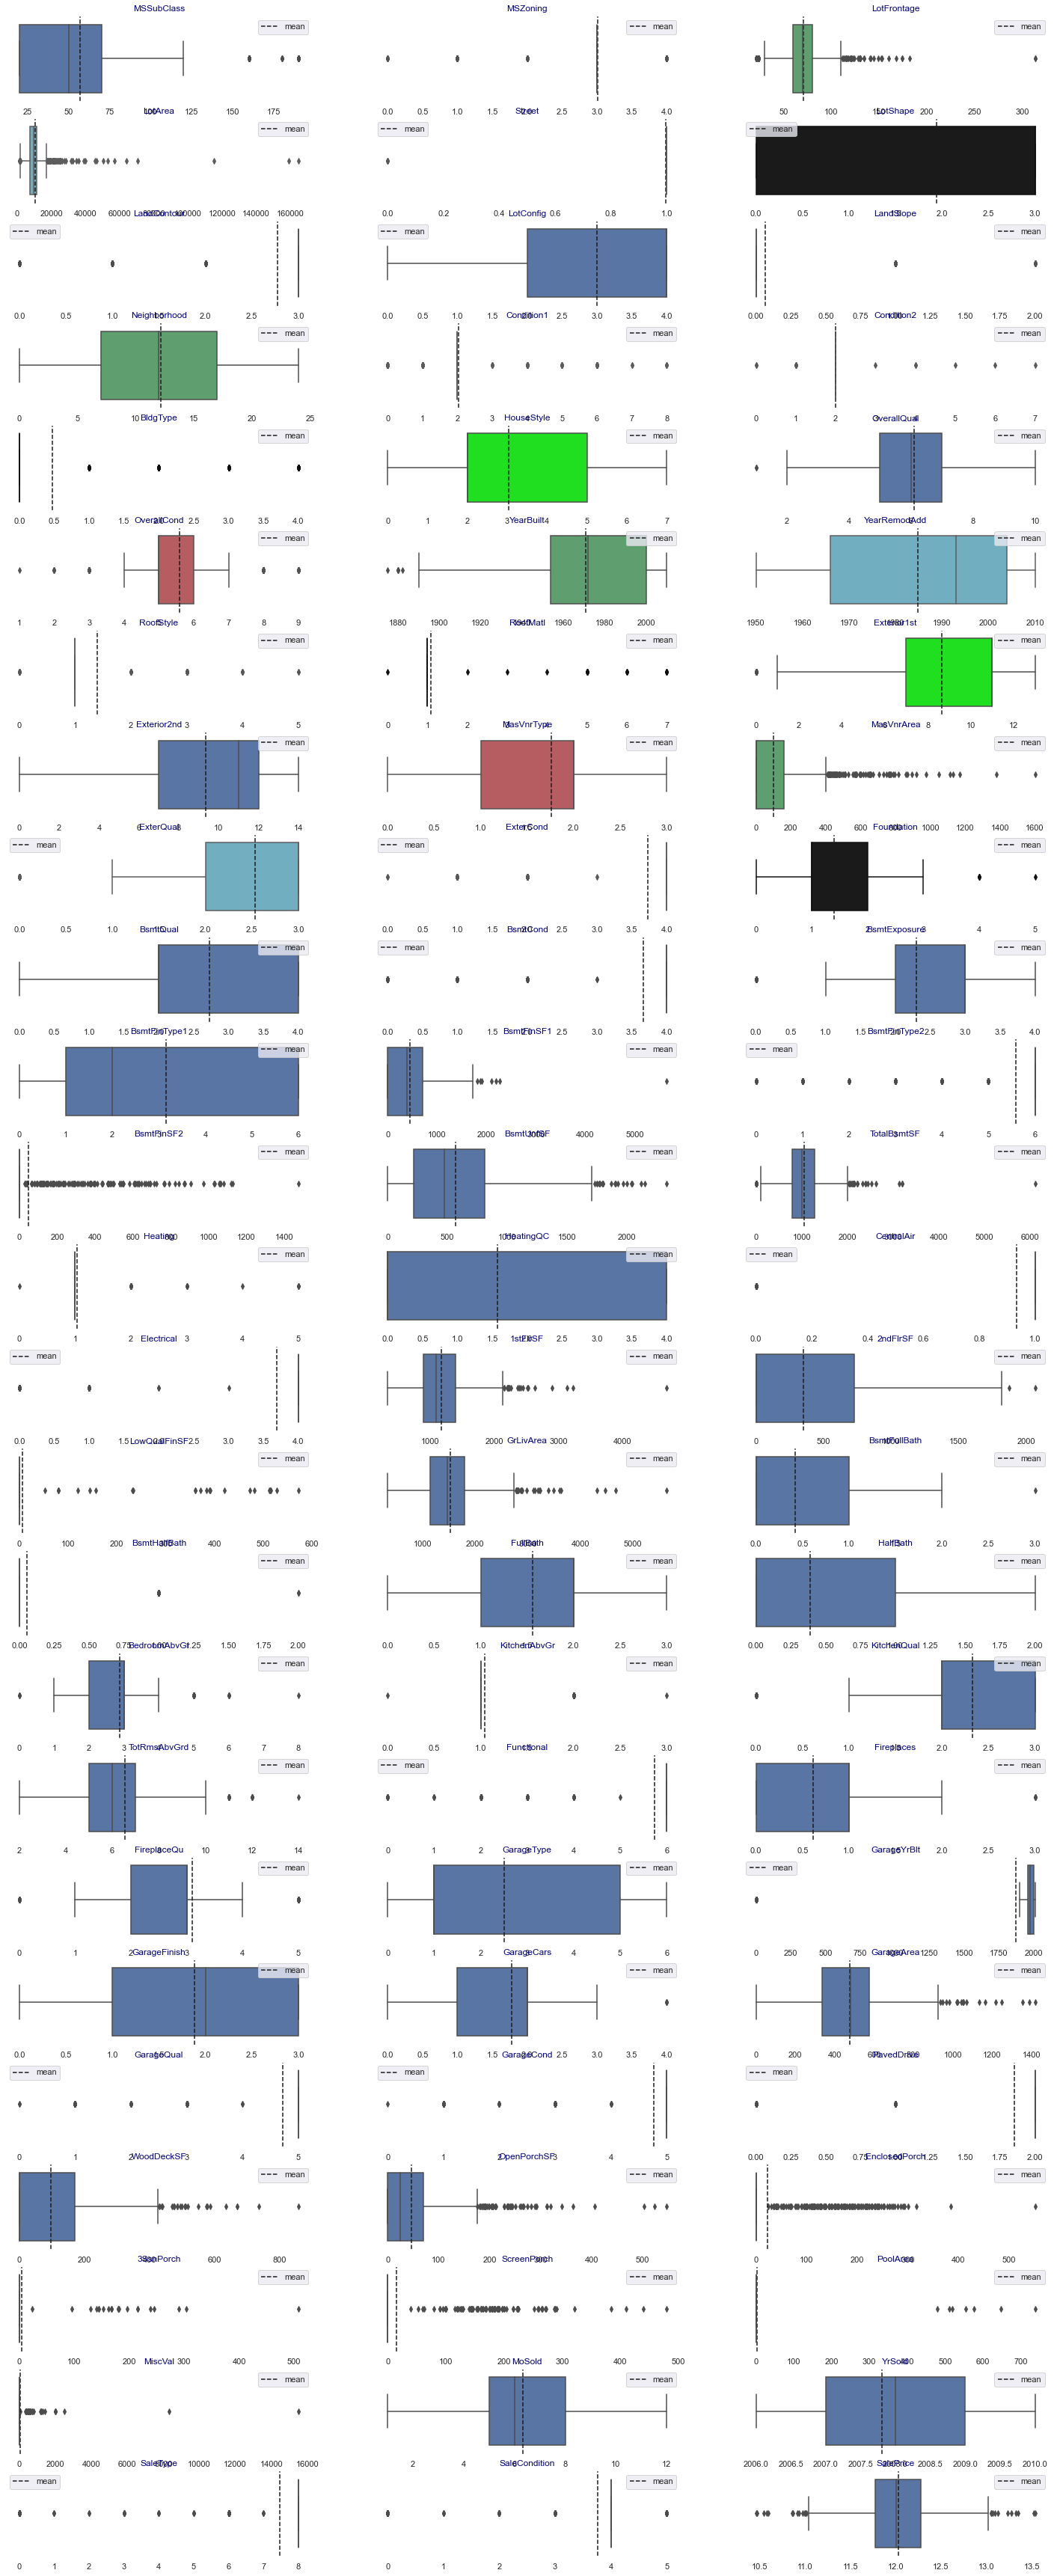

In [71]:
import itertools
import matplotlib.pyplot as plt
cols = [ 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']
length = len(cols)
cs = ["b","r","g","c","m","k",'lime',"b","r","g","c","m","k",'lime',"b","r","g","c","m","k",'lime',"b","r","g","c","m","k"]
fig = plt.figure(figsize=(25,70))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(28,3,j+1)
    ax = sns.boxplot(train[i],color=k)
    ax.set_facecolor("w")
    plt.axvline(train[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

Observations:
    
    1. From above plotting we see that outliers are present in multiple features columns.

# Check the percentage of data falls under outliers:

In [72]:
df=train

In [73]:
df.shape

(1168, 75)

In [74]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64),
 array([ 8, 19, 33, ..., 61, 62, 74], dtype=int64))

In [75]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(468, 75)

In [76]:
percentage_loss=((1168-468)/1168)*100
print(percentage_loss)

59.93150684931506


In [77]:
#hence Data loss is more then 50% we proceed without outliers removal.

In [78]:
df.shape

(1168, 75)

# Split the dataset in input columns and target columns..

In [79]:
x=df.drop("SalePrice",axis=1)

In [80]:
y=df['SalePrice']

# Removing skewness by transforming data.

In [81]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.37043472, -0.16245555, -2.73748347, ..., -0.60480623,
         0.40906852,  0.02973497],
       [-1.16799937, -0.16245555,  1.09321812, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.4900471 , -0.16245555,  0.97763911, ..., -0.60480623,
         0.40906852,  0.02973497],
       ...,
       [ 1.70079775, -0.16245555, -2.73748347, ...,  0.89957552,
         0.40906852,  0.02973497],
       [ 0.69655685, -2.92646435, -0.95901612, ...,  0.14807039,
         0.40906852,  0.02973497],
       [ 0.4900471 , -0.16245555, -0.13563515, ..., -1.3590026 ,
         0.40906852,  0.02973497]])

In [82]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.37043472, -0.16245555, -2.73748347, ..., -0.60482475,
         0.40906852,  0.02973497],
       [-1.16799937, -0.16245555,  1.09321812, ..., -0.60482475,
         0.40906852,  0.02973497],
       [ 0.4900471 , -0.16245555,  0.97763911, ..., -0.60482475,
         0.40906852,  0.02973497],
       ...,
       [ 1.70079775, -0.16245555, -2.73748347, ...,  0.899557  ,
         0.40906852,  0.02973497],
       [ 0.69655685, -2.92646435, -0.95901612, ...,  0.14805187,
         0.40906852,  0.02973497],
       [ 0.4900471 , -0.16245555, -0.13563515, ..., -1.35902113,
         0.40906852,  0.02973497]])

# Since the column has binary variable we will use linear Regression

# Regression Model Building:
#Linear Regression:

In [83]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [84]:
max_scr=0
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    if round(r2_score(ytrain,pred_train)*100,2)==round(r2_score(ytest,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
        print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)

At random state 428  The model performs very well
At random_state:- 428
Training r2_score is:- 89.89470549330272
Testing r2_score is:- 89.89013632118159


In [85]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=428)

In [86]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

pred_test=lr.predict(xtest)

from sklearn.metrics import accuracy_score
r2_score(ytest,pred_test)


0.8989013632118158

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [88]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [89]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_test))
print('Mean Squared Error:',mean_squared_error(ytest,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_test)))

Error:
Mean Absolute Error: 0.08700381436392544
Mean Squared Error: 0.015246267659488933
Root Mean Square Error: 0.12347577762253183


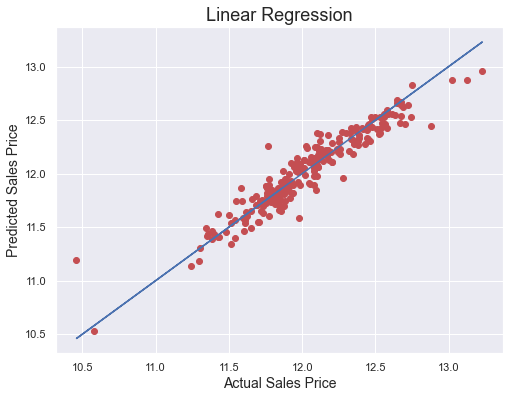

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_test, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regurlarization
As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

# 1. Lasso

In [91]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [92]:
ls = Lasso(alpha=.01,random_state=0)
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)
pred_ls = ls.predict(xtest)

lss = r2_score(ytest,pred_ls)
for j in range(2,13):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 85.99091860115713
R2_score is :- 89.51861169278845


At cv:- 3
Cross validation score is:- 86.97024296358343
R2_score is :- 89.51861169278845


At cv:- 4
Cross validation score is:- 86.81959613518185
R2_score is :- 89.51861169278845


At cv:- 5
Cross validation score is:- 86.64135671956275
R2_score is :- 89.51861169278845


At cv:- 6
Cross validation score is:- 86.95142380284962
R2_score is :- 89.51861169278845


At cv:- 7
Cross validation score is:- 86.53269903872359
R2_score is :- 89.51861169278845


At cv:- 8
Cross validation score is:- 86.8604540058871
R2_score is :- 89.51861169278845


At cv:- 9
Cross validation score is:- 86.43702326311045
R2_score is :- 89.51861169278845


At cv:- 10
Cross validation score is:- 86.56823315837372
R2_score is :- 89.51861169278845


At cv:- 11
Cross validation score is:- 86.41672549648412
R2_score is :- 89.51861169278845


At cv:- 12
Cross validation score is:- 86.16389097383578
R2_score is :- 89.51861169278845

# At cv:- 3
Cross validation score is:- 86.97024296358343
R2_score is :- 89.51861169278845

In [93]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_ls))
print('Mean Squared Error:',mean_squared_error(ytest,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_ls)))

Error:
Mean Absolute Error: 0.08776290933044126
Mean Squared Error: 0.01580654859962084
Root Mean Square Error: 0.1257240971318579


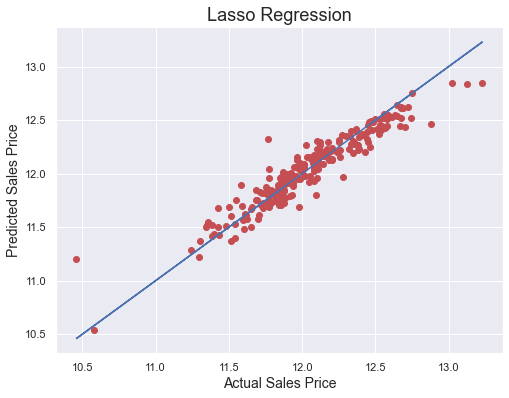

In [94]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_ls, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge

In [95]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [96]:
rd = Ridge(alpha=0.1, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)
pred_rd = rd.predict(xtest)
rds = r2_score(ytest,pred_rd)
for j in range(2,13):
    rds = r2_score(ytest,pred_rd)
    print("At cv:-",j)
    rdscore = cross_val_score(rd,x,y,cv=j)
    rdc = rdscore.mean() 
    print('Cross Val Score:',rdc*100)
    
   
    print('R2 Score:',rds*100)

   

At cv:- 2
Cross Val Score: 79.16659197470148
R2 Score: 89.95116471298007
At cv:- 3
Cross Val Score: 86.261409575264
R2 Score: 89.95116471298007
At cv:- 4
Cross Val Score: 86.53428317675277
R2 Score: 89.95116471298007
At cv:- 5
Cross Val Score: 85.71691987178237
R2 Score: 89.95116471298007
At cv:- 6
Cross Val Score: 86.47748395125487
R2 Score: 89.95116471298007
At cv:- 7
Cross Val Score: 85.92596595263997
R2 Score: 89.95116471298007
At cv:- 8
Cross Val Score: 86.25619404170062
R2 Score: 89.95116471298007
At cv:- 9
Cross Val Score: 85.94388030014825
R2 Score: 89.95116471298007
At cv:- 10
Cross Val Score: 85.97367921780756
R2 Score: 89.95116471298007
At cv:- 11
Cross Val Score: 85.82940600795087
R2 Score: 89.95116471298007
At cv:- 12
Cross Val Score: 85.8513356681962
R2 Score: 89.95116471298007


# At cv:- 4
Cross Val Score: 86.53428317675277
R2 Score: 89.95116471298007

In [97]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_rd))
print('Mean Squared Error:',mean_squared_error(ytest,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_rd)))

Error:
Mean Absolute Error: 0.08657546804099507
Mean Squared Error: 0.01515423326360115
Root Mean Square Error: 0.12310253150768732


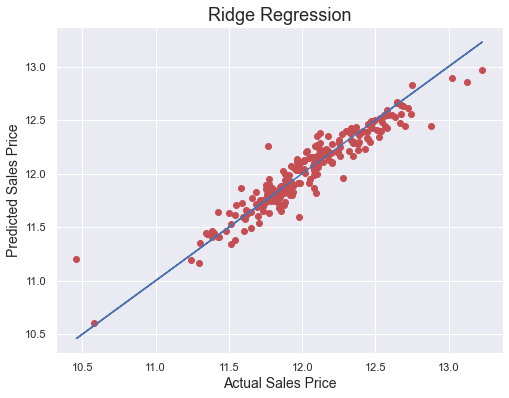

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_rd, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Ensemble Techniques:
Decision Tree Regressor

In [99]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'auto', 'splitter': 'best'}


In [100]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='friedman_mse', splitter='best',max_features= 'auto')
dt.fit(xtrain,ytrain)
dt.score(xtrain,ytrain)
pred_decision = dt.predict(xtest)

dts = r2_score(ytest,pred_decision)
for j in range(2,13):
    print("At cv:-",j)
    dts = r2_score(ytest,pred_decision)
    print('R2 Score:',dts*100)

    dtscore = cross_val_score(dt,x,y,cv=j)
    dtc = dtscore.mean() 
    print('Cross Val Score:',dtc*100)

At cv:- 2
R2 Score: 75.68871464818109
Cross Val Score: 69.32272259937395
At cv:- 3
R2 Score: 75.68871464818109
Cross Val Score: 68.56787312450811
At cv:- 4
R2 Score: 75.68871464818109
Cross Val Score: 68.75448353003398
At cv:- 5
R2 Score: 75.68871464818109
Cross Val Score: 69.07359062163776
At cv:- 6
R2 Score: 75.68871464818109
Cross Val Score: 67.7582666972425
At cv:- 7
R2 Score: 75.68871464818109
Cross Val Score: 69.70003748790306
At cv:- 8
R2 Score: 75.68871464818109
Cross Val Score: 70.0612285655734
At cv:- 9
R2 Score: 75.68871464818109
Cross Val Score: 72.89984464400763
At cv:- 10
R2 Score: 75.68871464818109
Cross Val Score: 71.27502500623241
At cv:- 11
R2 Score: 75.68871464818109
Cross Val Score: 69.99378873980599
At cv:- 12
R2 Score: 75.68871464818109
Cross Val Score: 70.63543740316469


# At cv:- 9
R2 Score: 76.08496707340382
Cross Val Score: 73.03298291944947

In [101]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_decision))
print('Mean Squared Error:',mean_squared_error(ytest,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_decision)))


Error:
Mean Absolute Error: 0.1435328582752939
Mean Squared Error: 0.03666284486076906
Root Mean Square Error: 0.1914754419260315


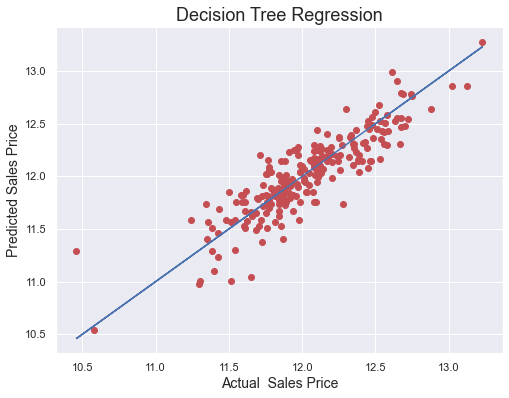

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_decision, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual  Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

# Gradient Boosting Regressor

In [103]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'huber', 'n_estimators': 200}


In [125]:
gbr= GradientBoostingRegressor(criterion='friedman_mse',loss='huber',n_estimators=200)
gbr.fit(xtrain, ytrain)
gbr.score(xtrain, ytrain)
pred_gradient = gbr.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)

    gbrs= r2_score(ytest,pred_gradient)
    print('R2 Score:',gbrs*100)

    gbscore = cross_val_score(gbr,x,y,cv=j)
    gbrc= gbscore.mean() 
    print('Cross Val Score:',gbrc*100)

At cv:- 2
R2 Score: 90.57810093721741
Cross Val Score: 87.7267690634513
At cv:- 3
R2 Score: 90.57810093721741
Cross Val Score: 88.35994377594116
At cv:- 4
R2 Score: 90.57810093721741
Cross Val Score: 87.75330130723748
At cv:- 5
R2 Score: 90.57810093721741
Cross Val Score: 88.38044526259141
At cv:- 6
R2 Score: 90.57810093721741
Cross Val Score: 88.56809677234797
At cv:- 7
R2 Score: 90.57810093721741
Cross Val Score: 88.26128642393333
At cv:- 8
R2 Score: 90.57810093721741
Cross Val Score: 88.61217268625474
At cv:- 9
R2 Score: 90.57810093721741
Cross Val Score: 88.65551240502737


# At cv:- 9
R2 Score: 90.55288176914567
Cross Val Score: 88.64708889146074

In [105]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_gradient))
print('Mean Squared Error:',mean_squared_error(ytest,pred_gradient))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_gradient)))


Error:
Mean Absolute Error: 0.0896296523588304
Mean Squared Error: 0.014504342392000344
Root Mean Square Error: 0.12043397523954917


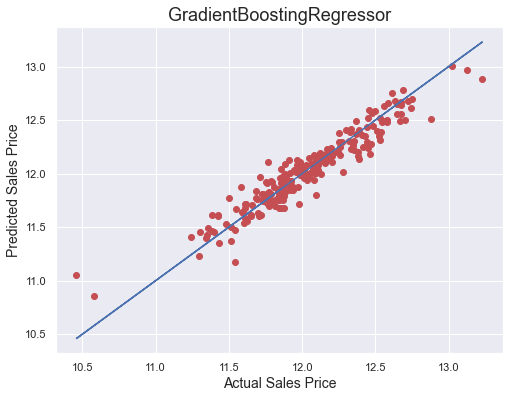

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_gradient, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

# RandomForestRegressor

In [107]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300],'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'auto', 'n_estimators': 200}


In [108]:
rf = RandomForestRegressor(criterion='friedman_mse',n_estimators=200, max_features= 'auto')
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
pred_random = rf.predict(xtest)
rfs = r2_score(ytest,pred_random)
for j in range(2,13):
    print("At cv:-",j)

    rfs = r2_score(ytest,pred_random)
    print('R2 Score:',rfs*100)

    rfscore = cross_val_score(rf,x,y,cv=j)
    rfc = rfscore.mean() 
    print('Cross Val Score:',rfc*100)

At cv:- 2
R2 Score: 87.65302842645562
Cross Val Score: 85.06277594782046
At cv:- 3
R2 Score: 87.65302842645562
Cross Val Score: 85.92400621078835
At cv:- 4
R2 Score: 87.65302842645562
Cross Val Score: 85.81847743667285
At cv:- 5
R2 Score: 87.65302842645562
Cross Val Score: 86.06262422231794
At cv:- 6
R2 Score: 87.65302842645562
Cross Val Score: 86.38897580588446
At cv:- 7
R2 Score: 87.65302842645562
Cross Val Score: 86.15250311300946
At cv:- 8
R2 Score: 87.65302842645562
Cross Val Score: 86.37756036845661
At cv:- 9
R2 Score: 87.65302842645562
Cross Val Score: 86.12500175290113
At cv:- 10
R2 Score: 87.65302842645562
Cross Val Score: 86.2345543417033
At cv:- 11
R2 Score: 87.65302842645562
Cross Val Score: 86.14146122083646
At cv:- 12
R2 Score: 87.65302842645562
Cross Val Score: 86.04347041988773


# At cv:- 6
R2 Score: 87.94178134684783
Cross Val Score: 86.45020355834592

In [109]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_random))
print('Mean Squared Error:',mean_squared_error(ytest,pred_random))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_random)))


Error:
Mean Absolute Error: 0.09304863696188452
Mean Squared Error: 0.018619957634914423
Root Mean Square Error: 0.13645496559273473


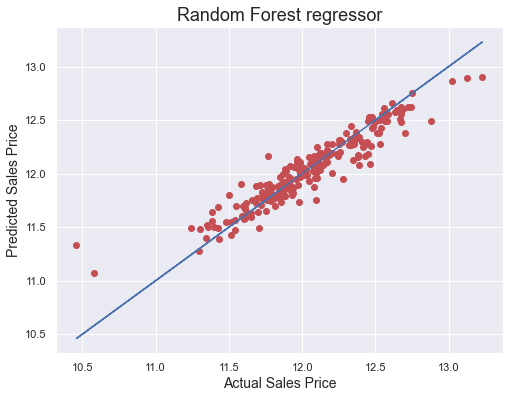

In [110]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

# Support vector Regression

In [111]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid'] ,'gamma': ['auto', 'scale'],'cache_size':[50,100,200,300]}
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'cache_size': 50, 'gamma': 'auto', 'kernel': 'linear'}


In [112]:
sv = SVR(kernel = 'linear', gamma = 'auto',cache_size= 50)
sv.fit(xtrain,ytrain)
sv.score(xtrain,ytrain)
pred_vector = sv.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)


    svs = r2_score(ytest,pred_vector)
    print('R2 Score:',svs*100)

    svscore = cross_val_score(sv,x,y,cv=j)
    svc = svscore.mean() 
    print('Cross Val Score:',svc*100)

At cv:- 2
R2 Score: 90.93986755733208
Cross Val Score: 84.97521669108913
At cv:- 3
R2 Score: 90.93986755733208
Cross Val Score: 85.70567982491158
At cv:- 4
R2 Score: 90.93986755733208
Cross Val Score: 85.91806957479203
At cv:- 5
R2 Score: 90.93986755733208
Cross Val Score: 84.87684659251883
At cv:- 6
R2 Score: 90.93986755733208
Cross Val Score: 85.7728003302487
At cv:- 7
R2 Score: 90.93986755733208
Cross Val Score: 85.42452604033663
At cv:- 8
R2 Score: 90.93986755733208
Cross Val Score: 85.57292649820613
At cv:- 9
R2 Score: 90.93986755733208
Cross Val Score: 85.13348433332311


In [113]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_gradient))
print('Mean Squared Error:',mean_squared_error(ytest,pred_gradient))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_gradient)))


Error:
Mean Absolute Error: 0.0896296523588304
Mean Squared Error: 0.014504342392000344
Root Mean Square Error: 0.12043397523954917


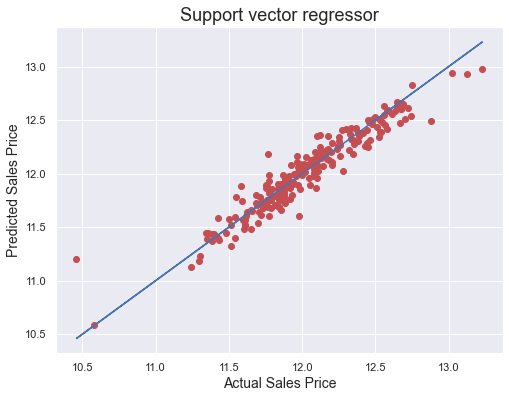

In [114]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_vector, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()


# KNeighborsRegressor

In [115]:
from sklearn.neighbors import KNeighborsRegressor

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,10,15,20,25]}
kn = KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}


In [116]:
kn = KNeighborsRegressor(algorithm = 'auto', weights = 'distance',n_neighbors=10)
kn.fit(xtrain,ytrain)
kn.score(xtrain,ytrain)
pred_k = kn.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)


    kns = r2_score(ytest,pred_k)
    print('R2 Score:',kns*100)

    knscore = cross_val_score(kn,x,y,cv=j)
    kvc = knscore.mean() 
    print('Cross Val Score:',kvc*2)

At cv:- 2
R2 Score: 78.67311771667677
Cross Val Score: 1.5474291505790447
At cv:- 3
R2 Score: 78.67311771667677
Cross Val Score: 1.5629565346165484
At cv:- 4
R2 Score: 78.67311771667677
Cross Val Score: 1.5752793530950284
At cv:- 5
R2 Score: 78.67311771667677
Cross Val Score: 1.5758690086629052
At cv:- 6
R2 Score: 78.67311771667677
Cross Val Score: 1.5785084071541446
At cv:- 7
R2 Score: 78.67311771667677
Cross Val Score: 1.5801071972383305
At cv:- 8
R2 Score: 78.67311771667677
Cross Val Score: 1.5822808519178104
At cv:- 9
R2 Score: 78.67311771667677
Cross Val Score: 1.5828637141621444


# At cv:- 8
R2 Score: 78.67311771667677
Cross Val Score: 1.5822808519178104

In [117]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_k))
print('Mean Squared Error:',mean_squared_error(ytest,pred_k))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_k)))


Error:
Mean Absolute Error: 0.13064262236109803
Mean Squared Error: 0.032162189913124584
Root Mean Square Error: 0.17933819981566834


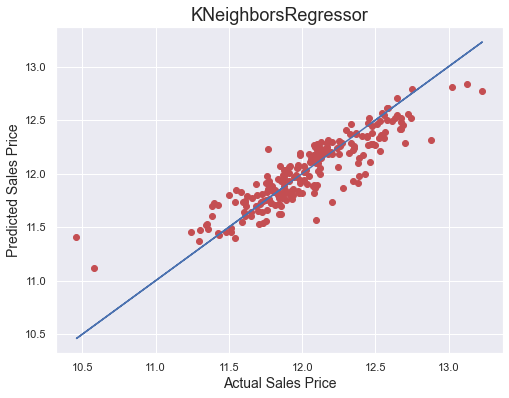

In [126]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_k, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=18)
plt.show()


# We tested 8 models out of which Gradient Boosting Regression performing Best as Accuracy score and CV is Optimum.

# Conclusion

In [119]:
ytest.shape

(234,)

In [120]:
import numpy as np
a=np.array(ytest)
a

array([12.4761036 , 12.54254845, 11.84223641, 12.20607765, 12.88029436,
       12.65035133, 12.10625784, 12.17303796, 12.09514667, 12.12811651,
       12.38422302, 13.22956979, 11.73607702, 11.88449592, 11.98293534,
       12.6760794 , 11.51293546, 11.96400745, 11.86358938, 11.58989577,
       11.84223641, 11.786009  , 12.08954445, 12.07824496, 12.12269647,
       12.07767662, 11.88449592, 11.92504174, 12.17045065, 11.34451865,
       11.51293546, 11.68688718, 11.80932691, 12.61652861, 11.79056478,
       12.47801017, 12.52453001, 13.02132905, 11.84079653, 11.87027818,
       12.55673304, 12.13619188, 12.01370681, 12.17045065, 12.35449696,
       12.17045065, 11.72804491, 12.1034916 , 11.49883668, 12.25486757,
       12.53537999, 11.93164238, 12.66980981, 11.87757552, 12.27606968,
       12.45683525, 11.54031687, 11.89068359, 12.4110563 , 11.42410518,
       12.41543771, 11.79056478, 12.10625784, 12.44509348, 12.05525557,
       12.3327097 , 12.32163544, 12.45293663, 12.08391066, 11.96

In [121]:
predicted=np.array(pred_gradient)
predicted

array([12.5648729 , 12.48389955, 11.85489622, 12.1956917 , 12.50902152,
       12.55613003, 12.02914502, 12.13717174, 11.80105418, 11.99848836,
       12.20358754, 12.88729938, 11.74653821, 11.99247724, 12.03914232,
       12.55588672, 11.37159432, 12.0775757 , 11.77609684, 11.6417226 ,
       11.68004339, 11.80670916, 12.15891775, 12.06385915, 12.18677788,
       12.0574254 , 11.83187942, 11.92638663, 12.16356323, 11.39717215,
       11.49781819, 11.83718654, 11.87330389, 12.75729141, 11.74853287,
       12.57255215, 12.35206313, 13.00287813, 11.83085129, 11.74942305,
       12.48990531, 12.12831688, 12.05986558, 12.14647855, 12.30106731,
       12.22551215, 11.80934952, 12.10636913, 11.7688522 , 12.29931457,
       12.39161989, 11.86246458, 12.49287853, 11.6759227 , 12.0122432 ,
       12.59358059, 11.17874349, 11.9373087 , 12.36050203, 11.61101622,
       12.25093157, 11.9316851 , 12.13133043, 12.29234204, 12.00370109,
       12.41737683, 12.30460312, 12.24218267, 11.94128402, 12.01

In [122]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [123]:
df_com.head(10)

original  predicted
0  12.476104  12.564873
1  12.542548  12.483900
2  11.842236  11.854896
3  12.206078  12.195692
4  12.880294  12.509022
5  12.650351  12.556130
6  12.106258  12.029145
7  12.173038  12.137172
8  12.095147  11.801054
9  12.128117  11.998488

# The best model is Gradient Bossting Regressor. Since the difference between the percentage score of cross validation and r2_score is optimum.

At cv:- 9
R2 Score: 90.55288176914567
Cross Val Score: 88.64708889146074

# Saving the best model using pickle library.

In [124]:
import pickle
filename = 'House_Price_Prediction.pkl'
pickle.dump(gbr, open(filename, 'wb'))